**EDA**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats

In [169]:
url = '/content/bank-additional-full.csv'
df=pd.read_csv(url,delimiter=';')
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [170]:
df.shape

(41188, 21)

In [171]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Exploring all features**


Column Name: age
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64


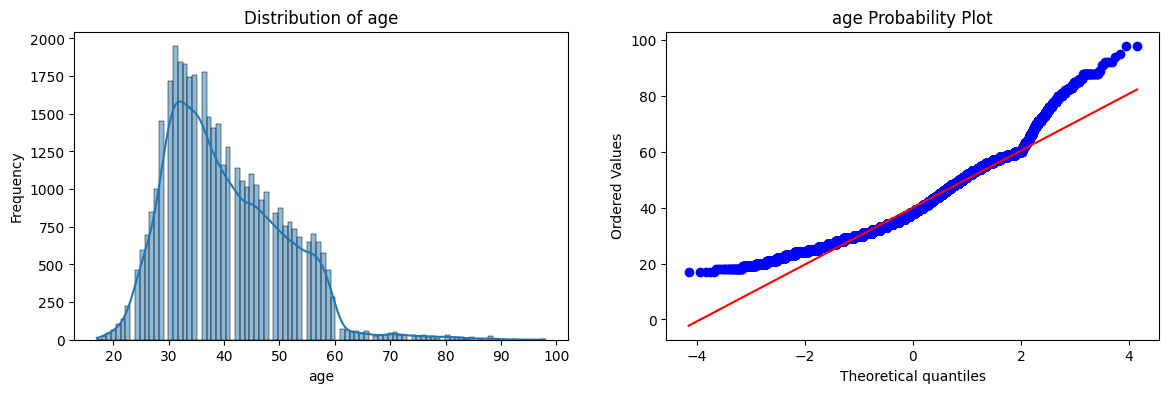


Column Name: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Column Name: marital
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

Column Name: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

Column Name: default
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Column Name: housing
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

Column Name: loan
loan
no         33950
y

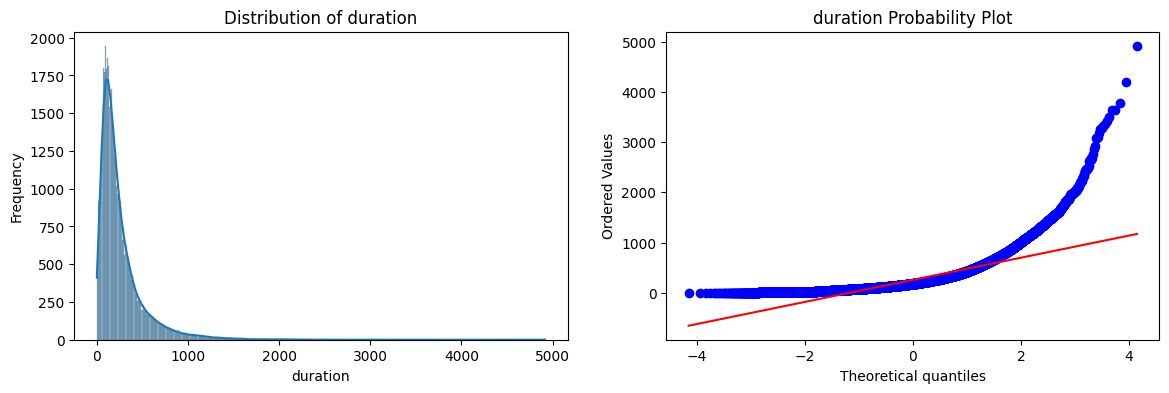


Column Name: campaign
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


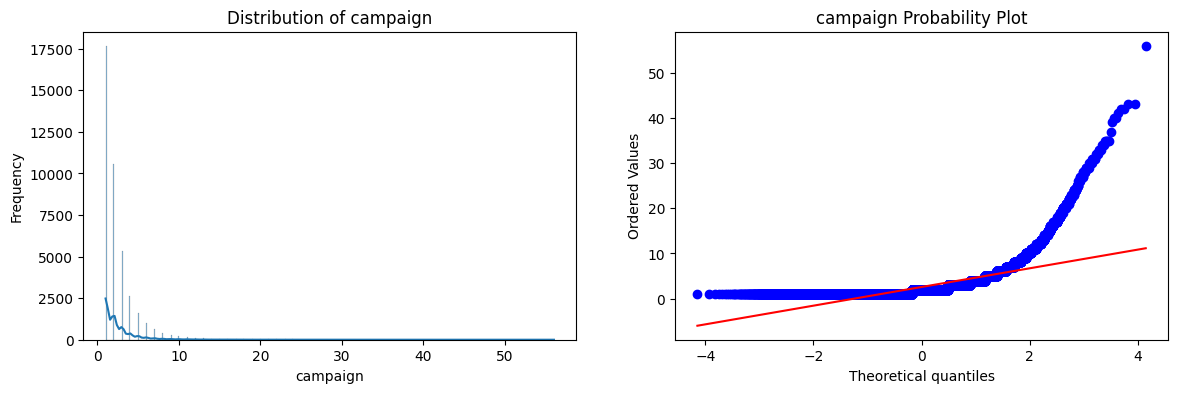


Column Name: pdays
count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64


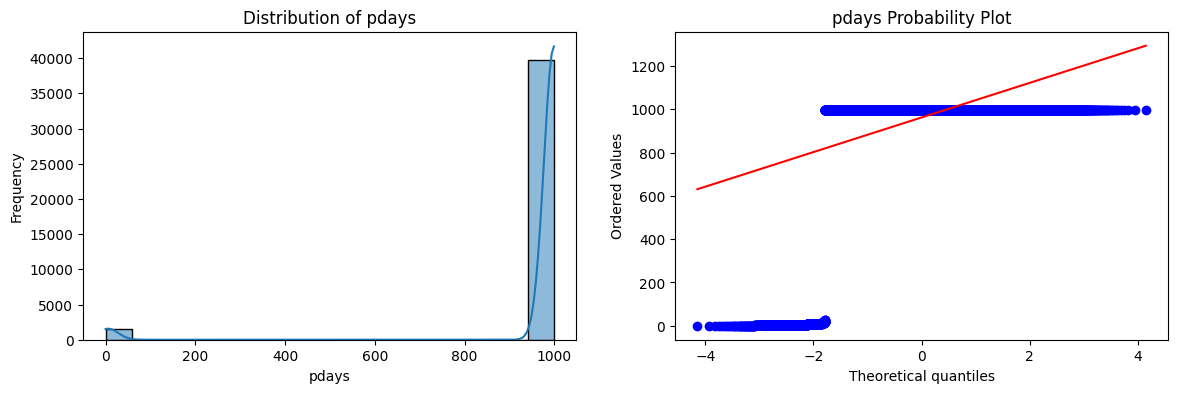


Column Name: previous
count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64


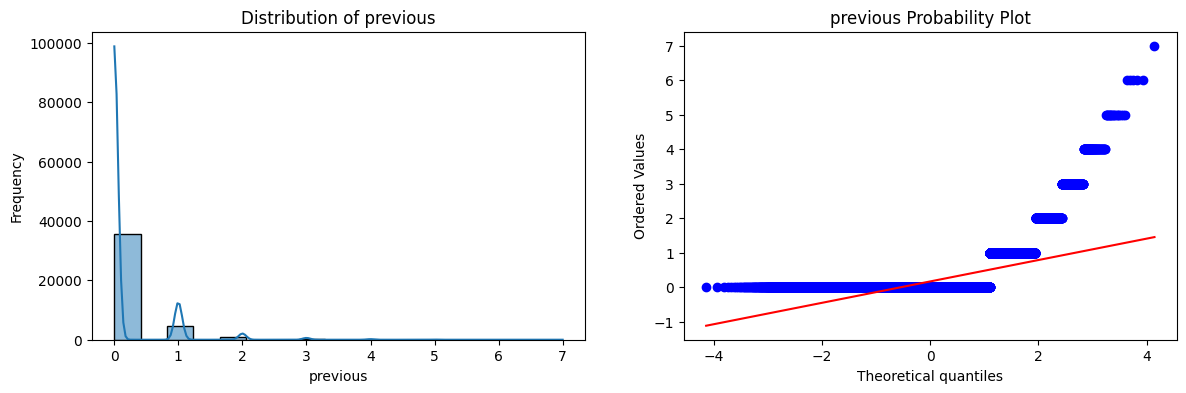


Column Name: poutcome
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

Column Name: emp.var.rate
count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64


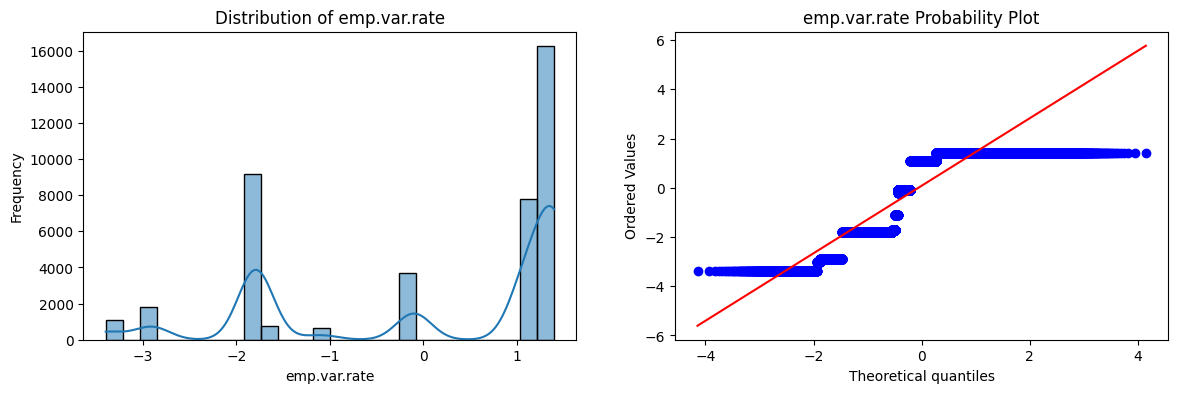


Column Name: cons.price.idx
count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64


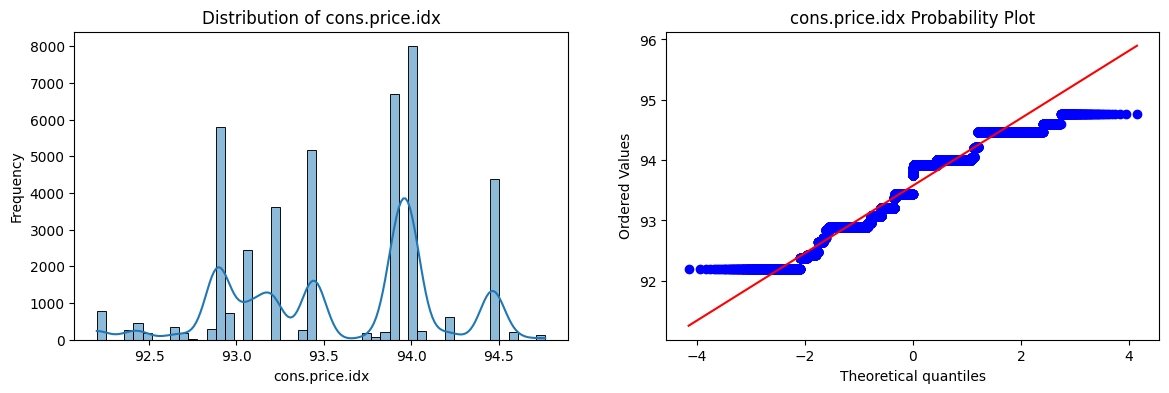


Column Name: cons.conf.idx
count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64


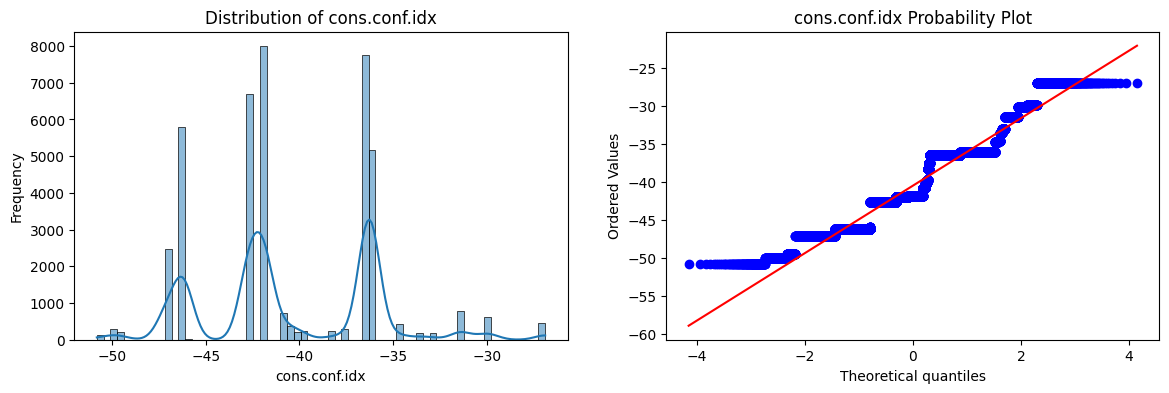


Column Name: euribor3m
count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64


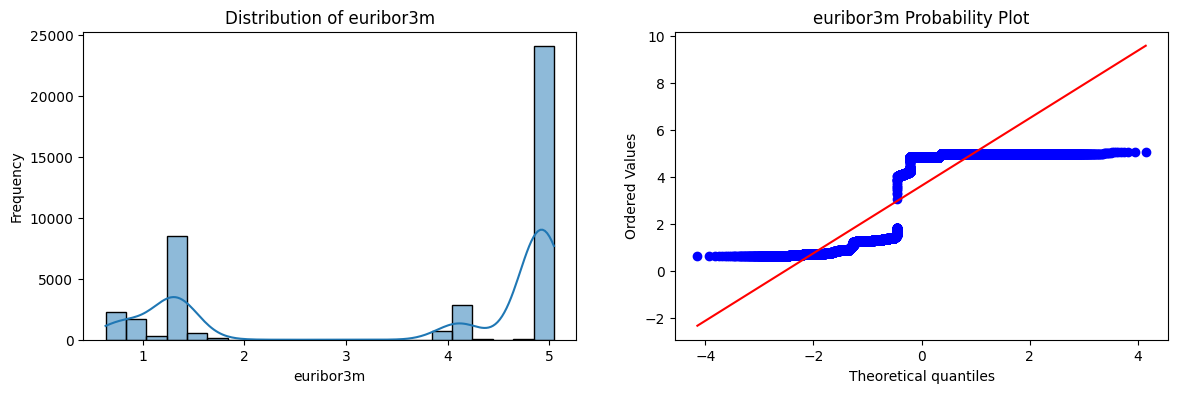


Column Name: nr.employed
count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64


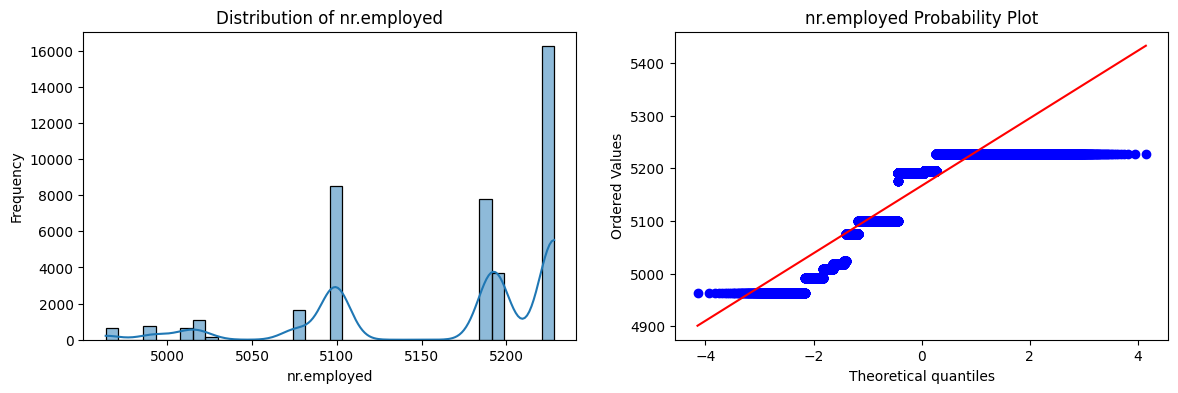


Column Name: y
y
no     36548
yes     4640
Name: count, dtype: int64


In [173]:

def explore_data(df):
    """
    Explores numerical and categorical features of a pandas DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to explore.

    Returns:
        None
    """

    cols = list(df.columns)

    for col_name in cols:
        print(f"\nColumn Name: {col_name}")

        if pd.api.types.is_numeric_dtype(df[col_name]):
            print(df[col_name].describe())

            plt.figure(figsize=(14, 4))
            plt.subplot(121)
            sns.histplot(df[col_name], kde=True)
            plt.xlabel(col_name)
            plt.ylabel("Frequency")
            plt.title(f"Distribution of {col_name}")

            plt.subplot(122)
            try:
                stats.probplot(df[col_name], dist='norm', plot=plt)
                plt.title(f"{col_name} Probability Plot")
            except Exception as e:
                print(f"Error generating probability plot for {col_name}: {e}")
            plt.show()

        else:
            print(df[col_name].value_counts())


explore_data(df)


In [174]:
df = df[(df['job'] != 'unknown') & (df['marital'] != 'unknown') & (df['loan'] != 'unknown') & (df['housing'] != 'unknown')]

In [175]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix_data = corr_matrix.values.tolist()

row_labels = corr_matrix.index.to_numpy()
col_labels = corr_matrix.columns.to_numpy()


fig = go.Figure(layout=dict(width=800, height=800))
fig.add_trace(dict(
    z=corr_matrix_data,
    x=col_labels,
    y=row_labels.tolist(),
    type='heatmap',
    colorscale='electric'
))
fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features'
)
fig.update_traces(colorbar=dict(dtick=0.2))
fig.show()

**Target Variable 'y' Pie Chart**

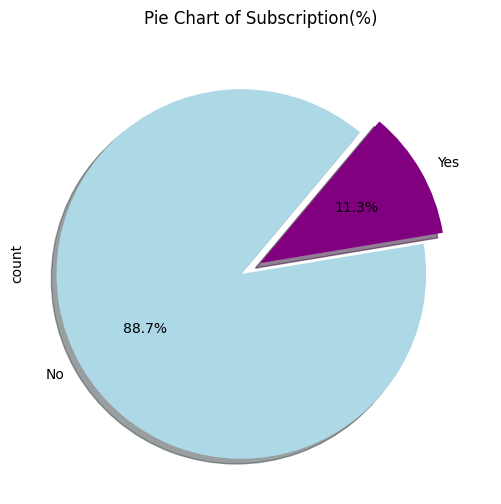

In [176]:
df['y'].value_counts().plot(kind='pie', figsize=(10,6),
                                 autopct="%1.1f%%", startangle=50,shadow=True,
                                 labels=['No', 'Yes'], colors=['lightblue', 'purple'],
                                 explode=[0.12,0])
plt.title("Pie Chart of Subscription(%)")
plt.show()

**Checking distribution of different features**

<Axes: xlabel='marital'>

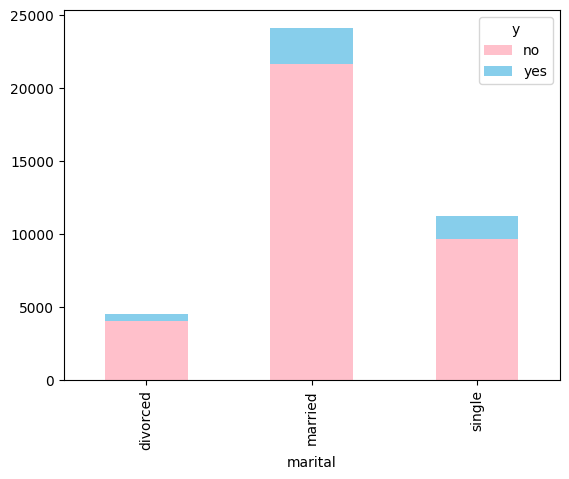

In [177]:
rev_viridis = ['pink', 'skyblue']
df.groupby(['marital', 'y']).y.count().unstack().plot(kind='bar', stacked=True, color=rev_viridis)

<Axes: xlabel='job'>

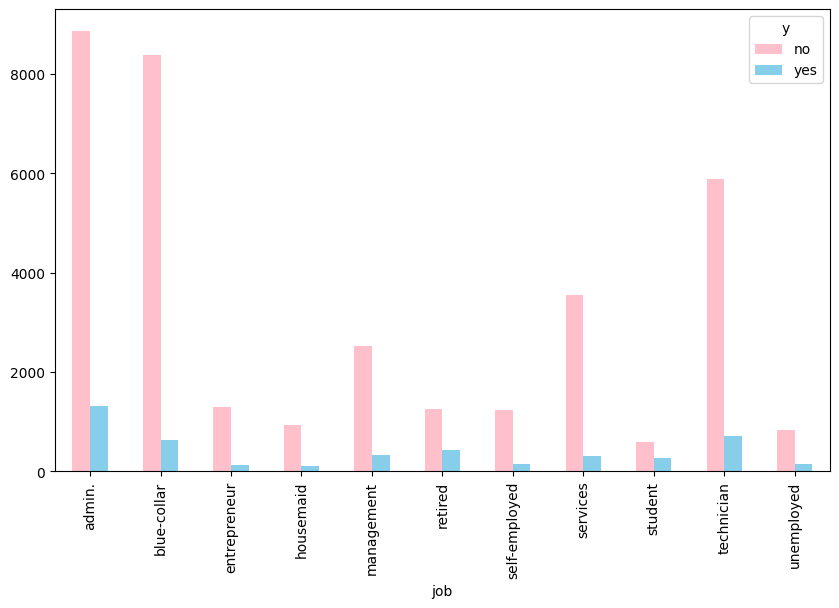

In [178]:
df.groupby(['job', 'y']).y.count().unstack().plot(kind='bar', figsize=(10,6), color=rev_viridis)

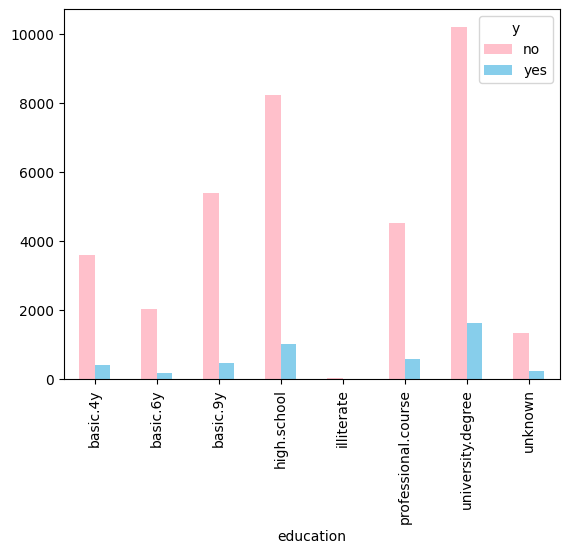

In [179]:
ax = df.groupby(['education', 'y']).y.count().unstack().plot(kind='bar', color=rev_viridis)

In [180]:
df['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 18, 23, 14, 22,
       25, 16, 17, 15, 19, 20, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29, 31,
       30, 41, 37, 40, 33, 34, 43])

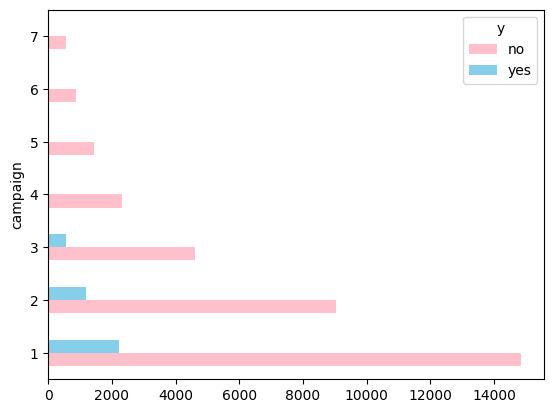

In [181]:
ax = df.groupby(['campaign', 'y']).y.count().nlargest(10).sort_values(ascending=True).unstack().plot(kind='barh', color=rev_viridis)

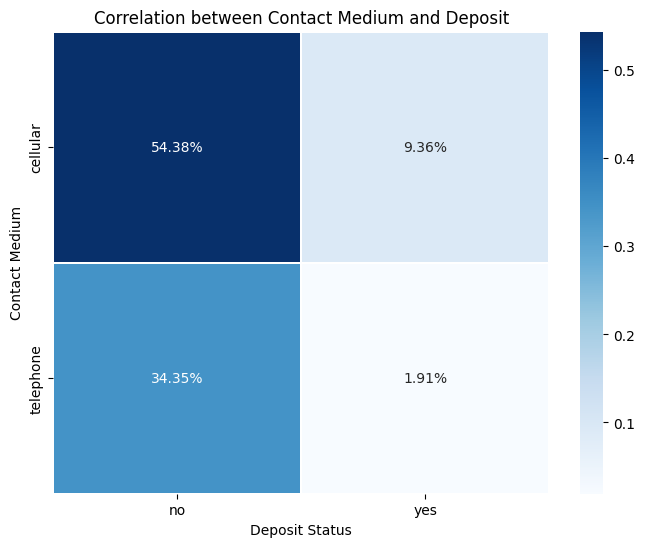

In [182]:
cross_tab1 = pd.crosstab(df['contact'], df['y'], normalize="all")
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab1, annot=True, fmt=".2%", cmap="Blues", linewidths=0.3)
plt.title('Correlation between Contact Medium and Deposit')
plt.xlabel('Deposit Status')
plt.ylabel('Contact Medium')
plt.show()

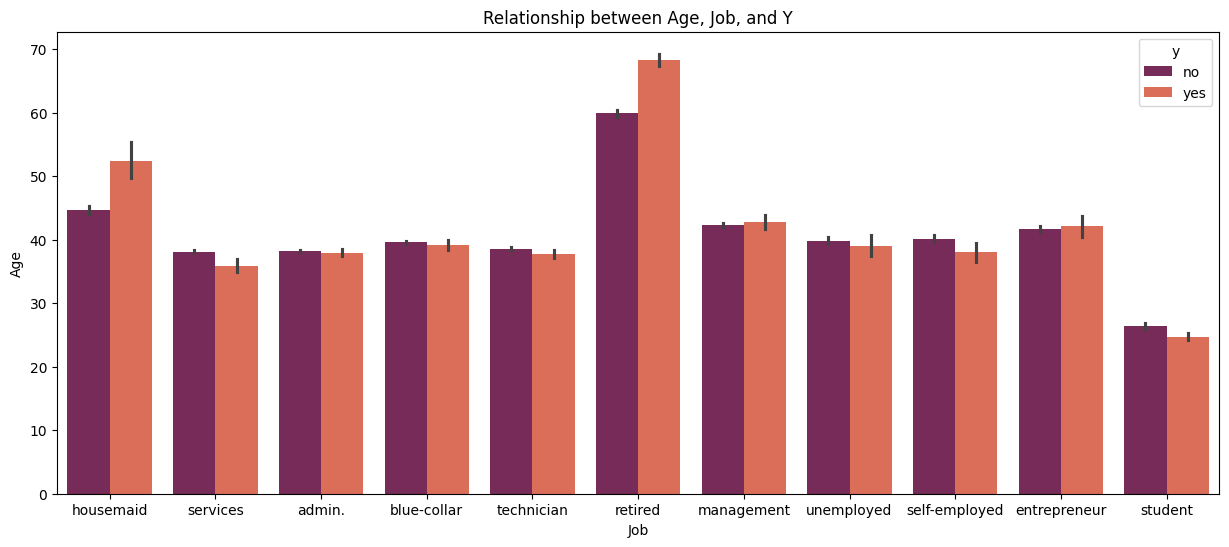

In [183]:
plt.figure(figsize=(15, 6))
sns.barplot(x='job', y='age', hue='y', data=df, palette='rocket')
plt.xlabel('Job')
plt.ylabel('Age')
plt.title('Relationship between Age, Job, and Y')
plt.show()

**Making A separate df of subscribed customers for further analysis**

In [184]:
sub_df= df[df['y']=='yes']

In [185]:
sub_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


**Checking distrubution of features in sub_df**

In [186]:
sub_marital_status=sub_df.groupby(['marital'])['y'].value_counts().reset_index(name='counts')
sub_marital_status

,marital,y,counts
0,divorced,yes,465
1,married,yes,2456
2,single,yes,1566


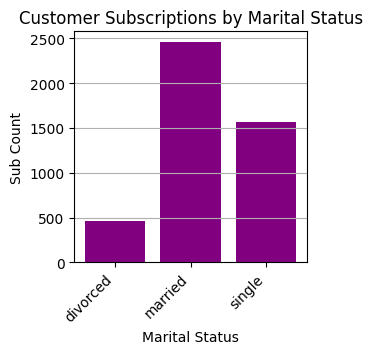

In [187]:
plt.figure(figsize=(3, 3))
plt.bar(sub_marital_status['marital'], sub_marital_status['counts'], color='purple')
plt.xlabel("Marital Status")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by Marital Status")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [188]:
sub_edu=sub_df.groupby(['education'])['y'].value_counts().reset_index(name='counts')
sub_edu

,education,y,counts
0,basic.4y,yes,412
1,basic.6y,yes,180
2,basic.9y,yes,457
3,high.school,yes,1007
4,illiterate,yes,4
5,professional.course,yes,578
6,university.degree,yes,1620
7,unknown,yes,229


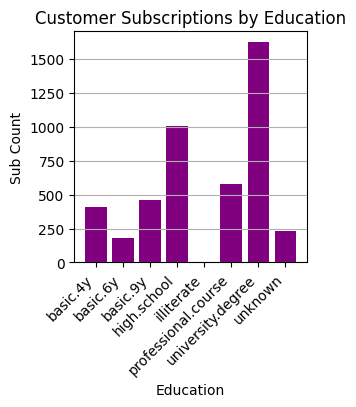

In [189]:
plt.figure(figsize=(3, 3))
plt.bar(sub_edu['education'], sub_edu['counts'], color='purple')
plt.xlabel("Education")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by Education")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [190]:
sub_default=sub_df.groupby(['default'])['y'].value_counts().reset_index(name='counts')
sub_default

,default,y,counts
0,no,yes,4062
1,unknown,yes,425


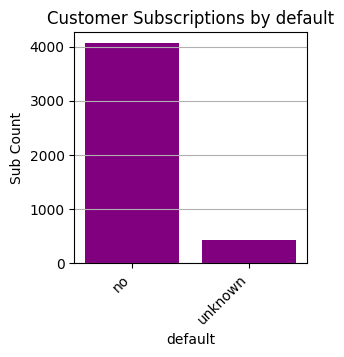

In [191]:
plt.figure(figsize=(3, 3))
plt.bar(sub_default['default'], sub_default['counts'], color='purple')
plt.xlabel("default")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by default")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [192]:
sub_loan=sub_df.groupby(['loan'])['y'].value_counts().reset_index(name='counts')
sub_loan

,loan,y,counts
0,no,yes,3809
1,yes,yes,678


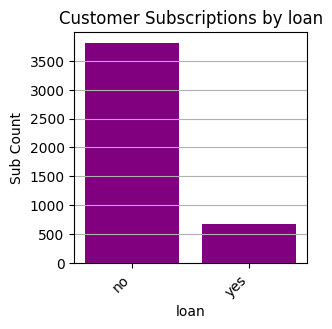

In [193]:
plt.figure(figsize=(3, 3))
plt.bar(sub_loan['loan'], sub_loan['counts'], color='purple')
plt.xlabel("loan")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by loan")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [194]:
sub_housing=sub_df.groupby(['housing'])['y'].value_counts().reset_index(name='counts')
sub_housing

,housing,y,counts
0,no,yes,2004
1,yes,yes,2483


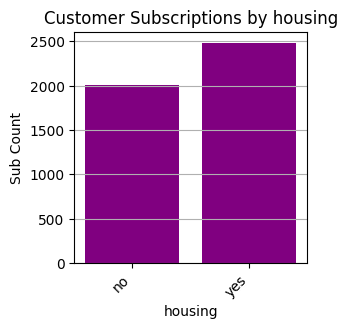

In [195]:
plt.figure(figsize=(3, 3))
plt.bar(sub_housing['housing'], sub_housing['counts'], color='purple')
plt.xlabel("housing")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by housing")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [196]:
sub_contact=sub_df.groupby(['contact'])['y'].value_counts().reset_index(name='counts')
sub_contact

,contact,y,counts
0,cellular,yes,3726
1,telephone,yes,761


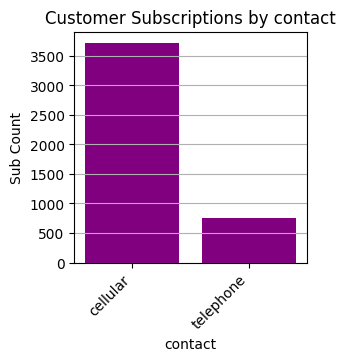

In [197]:
plt.figure(figsize=(3, 3))
plt.bar(sub_contact['contact'], sub_contact['counts'], color='purple')
plt.xlabel("contact")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by contact")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [198]:
sub_month=sub_df.groupby(['month'])['y'].value_counts().reset_index(name='counts')
sub_month

,month,y,counts
0,apr,yes,522
1,aug,yes,628
2,dec,yes,85
3,jul,yes,630
4,jun,yes,537
5,mar,yes,269
6,may,yes,864
7,nov,yes,406
8,oct,yes,302
9,sep,yes,244


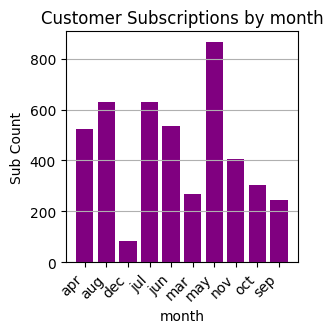

In [199]:
plt.figure(figsize=(3, 3))
plt.bar(sub_month['month'], sub_month['counts'], color='purple')
plt.xlabel("month")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by month")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [200]:
sub_poutcome=sub_df.groupby(['poutcome'])['y'].value_counts().reset_index(name='counts')
sub_poutcome

,poutcome,y,counts
0,failure,yes,572
1,nonexistent,yes,3051
2,success,yes,864


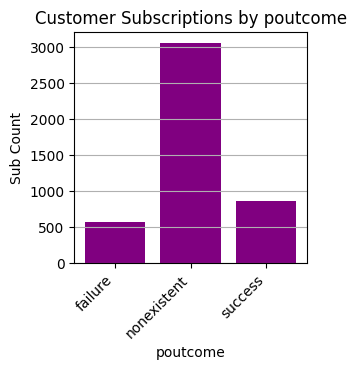

In [201]:
plt.figure(figsize=(3, 3))
plt.bar(sub_poutcome['poutcome'], sub_poutcome['counts'], color='purple')
plt.xlabel("poutcome")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by poutcome")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [202]:
sub_job=sub_df.groupby(['job'])['y'].value_counts().reset_index(name='counts')
sub_job

,job,y,counts
0,admin.,yes,1321
1,blue-collar,yes,619
2,entrepreneur,yes,120
3,housemaid,yes,103
4,management,yes,324
5,retired,yes,423
6,self-employed,yes,147
7,services,yes,316
8,student,yes,264
9,technician,yes,707


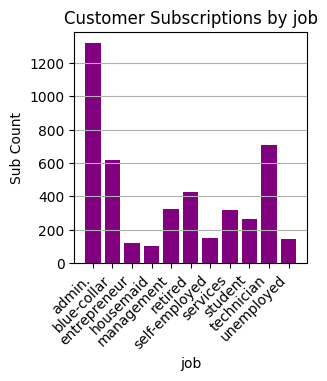

In [203]:
plt.figure(figsize=(3, 3))
plt.bar(sub_job['job'], sub_job['counts'], color='purple')
plt.xlabel("job")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by job")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [204]:
sub_dow=sub_df.groupby(['day_of_week'])['y'].value_counts().reset_index(name='counts')
sub_dow

,day_of_week,y,counts
0,fri,yes,821
1,mon,yes,823
2,thu,yes,1007
3,tue,yes,916
4,wed,yes,920


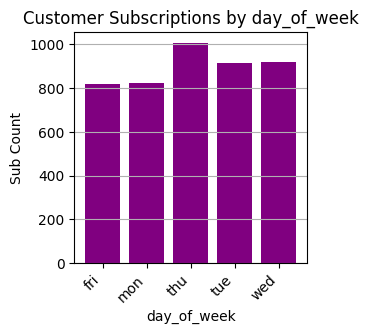

In [205]:
plt.figure(figsize=(3, 3))
plt.bar(sub_dow['day_of_week'], sub_dow['counts'], color='purple')
plt.xlabel("day_of_week")
plt.ylabel("Sub Count")
plt.title("Customer Subscriptions by day_of_week")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


Column Name: age
count    4487.000000
mean       40.864943
std        13.789434
min        17.000000
25%        31.000000
50%        37.000000
75%        49.000000
max        98.000000
Name: age, dtype: float64

Column Name: duration
count    4487.000000
mean      553.271897
std       400.083235
min        37.000000
25%       255.000000
50%       449.000000
75%       741.000000
max      4199.000000
Name: duration, dtype: float64

Column Name: campaign
count    4487.000000
mean        2.056162
std         1.659075
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign, dtype: float64

Column Name: pdays
count    4487.000000
mean      792.726543
std       402.909508
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64

Column Name: previous
count    4487.000000
mean        0.487854
std         0.858605
min         0.000000
25%         0.000000


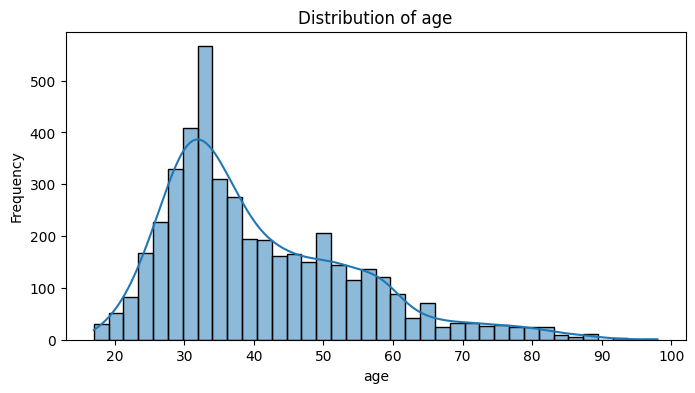

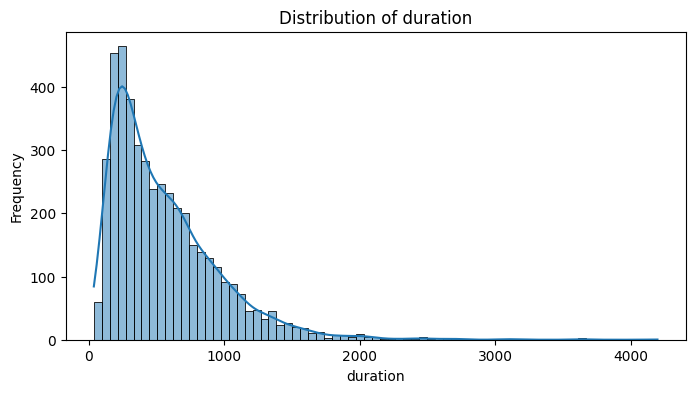

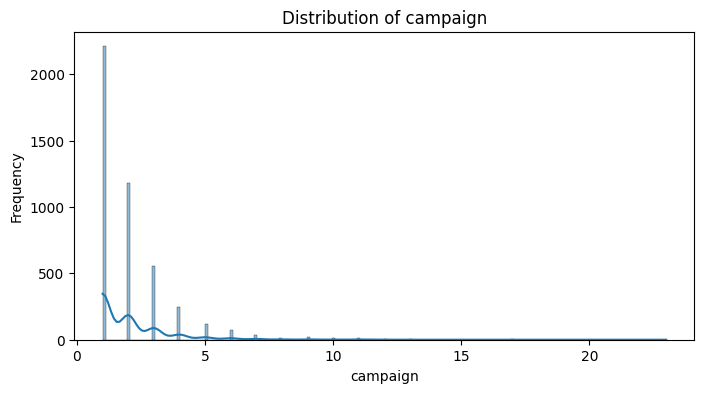

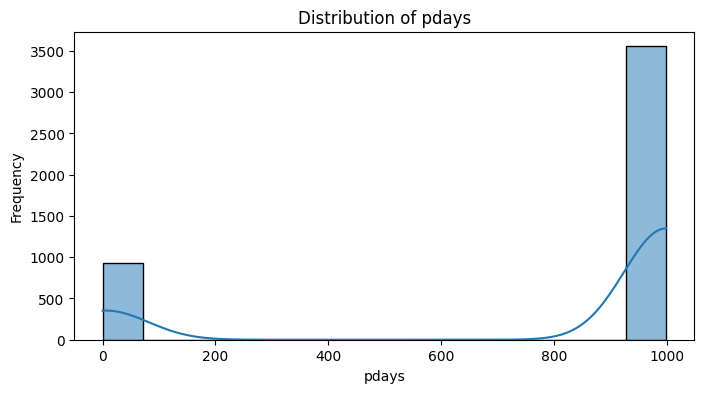

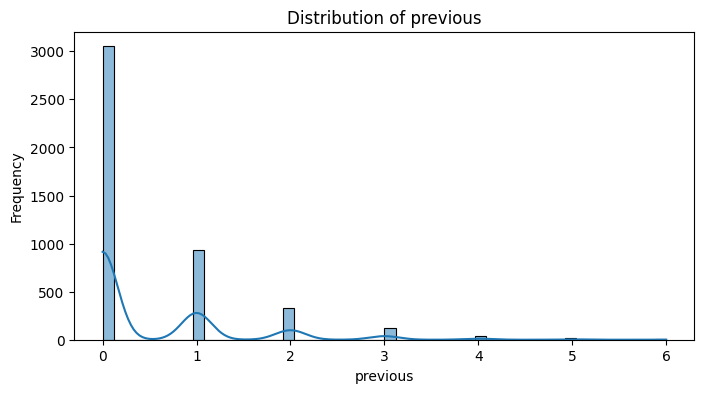

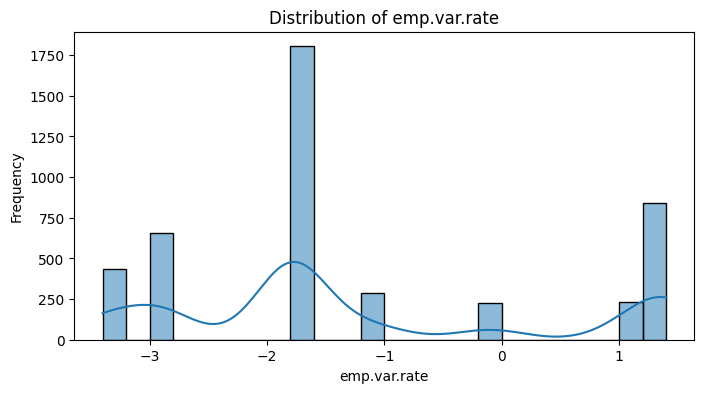

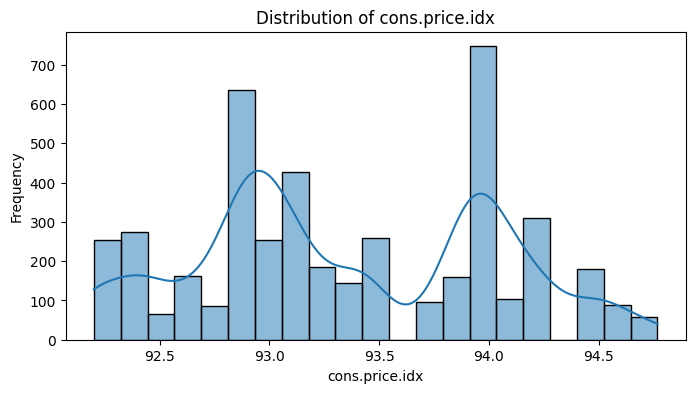

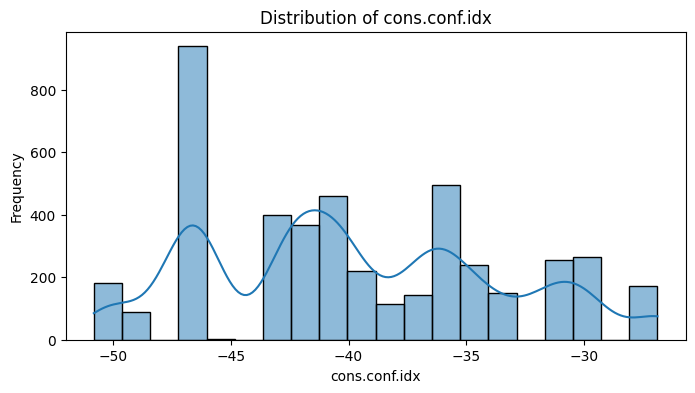

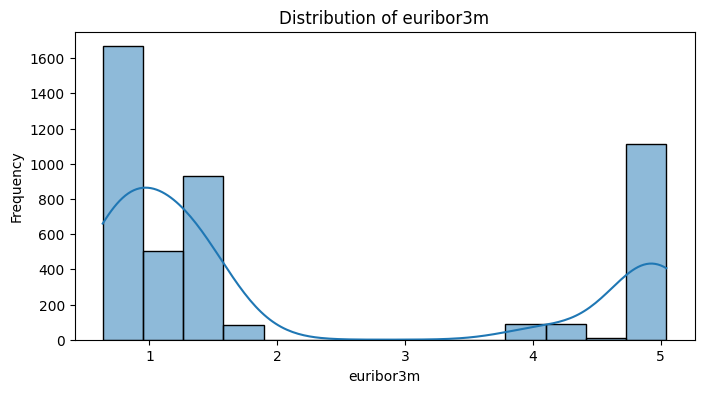

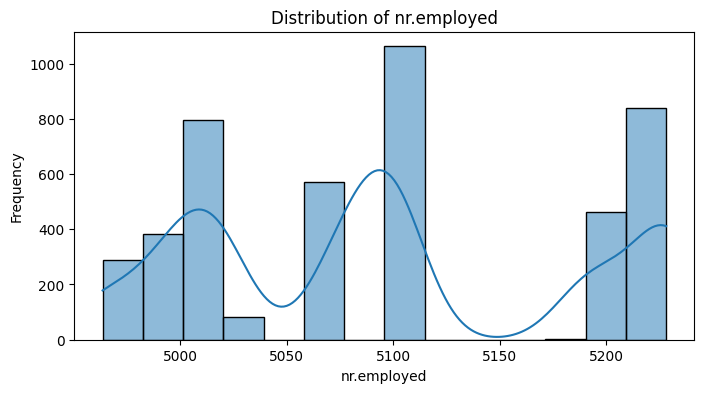

In [206]:
cols = list(sub_df.columns)
for col_name in cols:

        if pd.api.types.is_numeric_dtype(sub_df[col_name]):
          print(f"\nColumn Name: {col_name}")
          print(sub_df[col_name].describe())
          plt.figure(figsize=(8, 4))
          sns.histplot(sub_df[col_name], kde=True)
          plt.xlabel(col_name)
          plt.ylabel("Frequency")
          plt.title(f"Distribution of {col_name}")


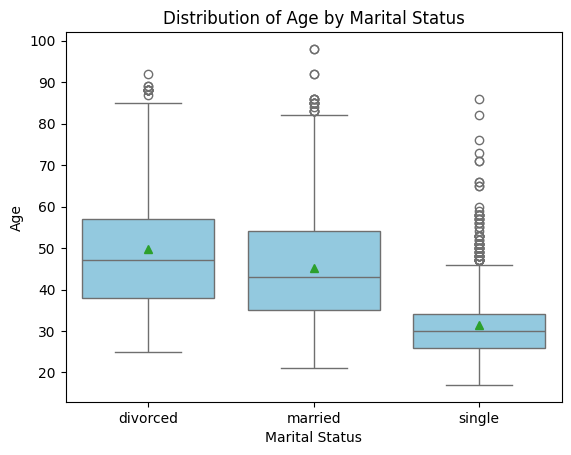

In [207]:
sns.boxplot(x='marital', y='age', showmeans=True, data=sub_df, color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Distribution of Age by Marital Status')
plt.show()


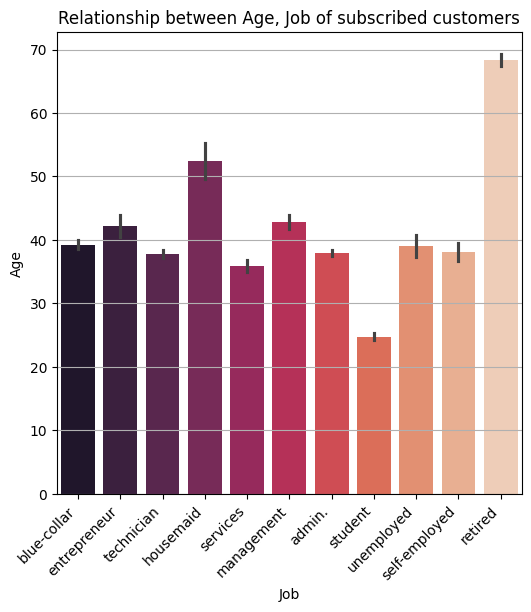

In [208]:
plt.figure(figsize=(6, 6))
sns.barplot(x='job', y='age', hue='job',legend=False, data=sub_df, palette='rocket')
plt.xlabel('Job')
plt.ylabel('Age')
plt.title('Relationship between Age, Job of subscribed customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

**Hypothesis testing for targeted marketing**

*Hypothesis # 1 : Do marital status and education level influence customers' decisions to purchase term deposits?*

**Analysis of Distribution of subscribed customers by their education level and marital status**

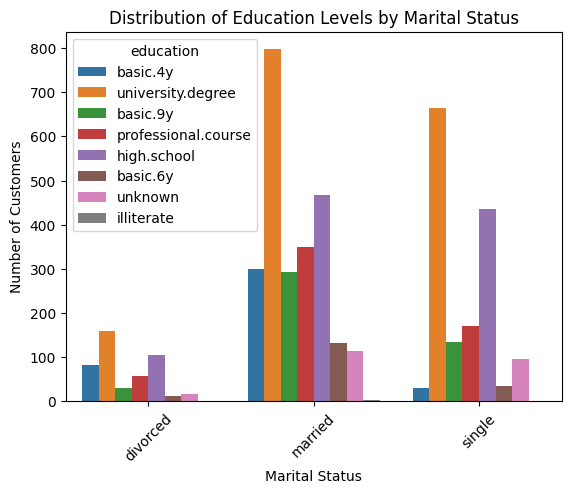

In [209]:
sns.countplot(x='marital', hue='education', data=sub_df)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Education Levels by Marital Status')
plt.xticks(rotation=45)
plt.show()


*Yes, There seem to have some relation between marital status and education level. Single and married people with university level education are more likely to make a purchase, but this need further analysis.*

Total rows in sub_df: 4487


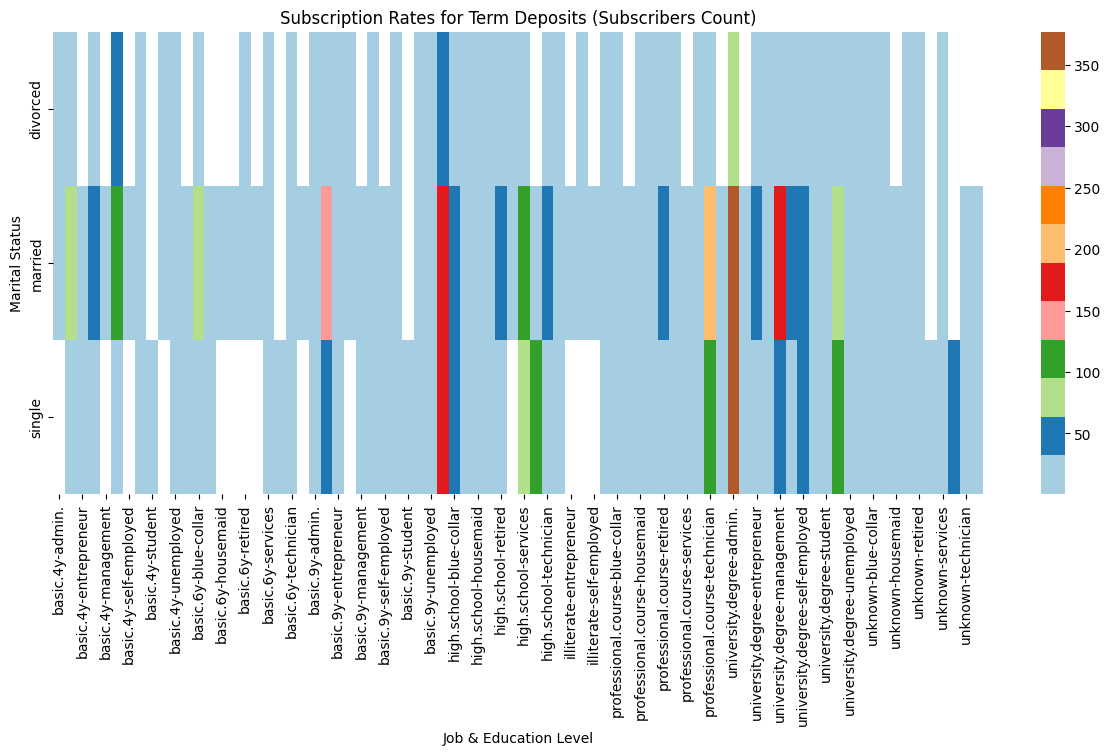

In [210]:
total_rows = sub_df.shape[0]
print(f"Total rows in sub_df: {total_rows}")

plt.figure(figsize=(15, 6))
crosstab = pd.crosstab(sub_df['marital'], [sub_df['education'], sub_df['job']], values='y', aggfunc='count')
sns.heatmap(crosstab,cmap='Paired')
plt.xlabel('Job & Education Level')
plt.ylabel('Marital Status')
plt.title('Subscription Rates for Term Deposits (Subscribers Count)')
plt.show()

*Factors like having a university degree, working in administration, and marital status (single or married) might be associated with a customer's decision to purchase a term deposit.Lets analyze it further*

Total rows in sub_df: 4487


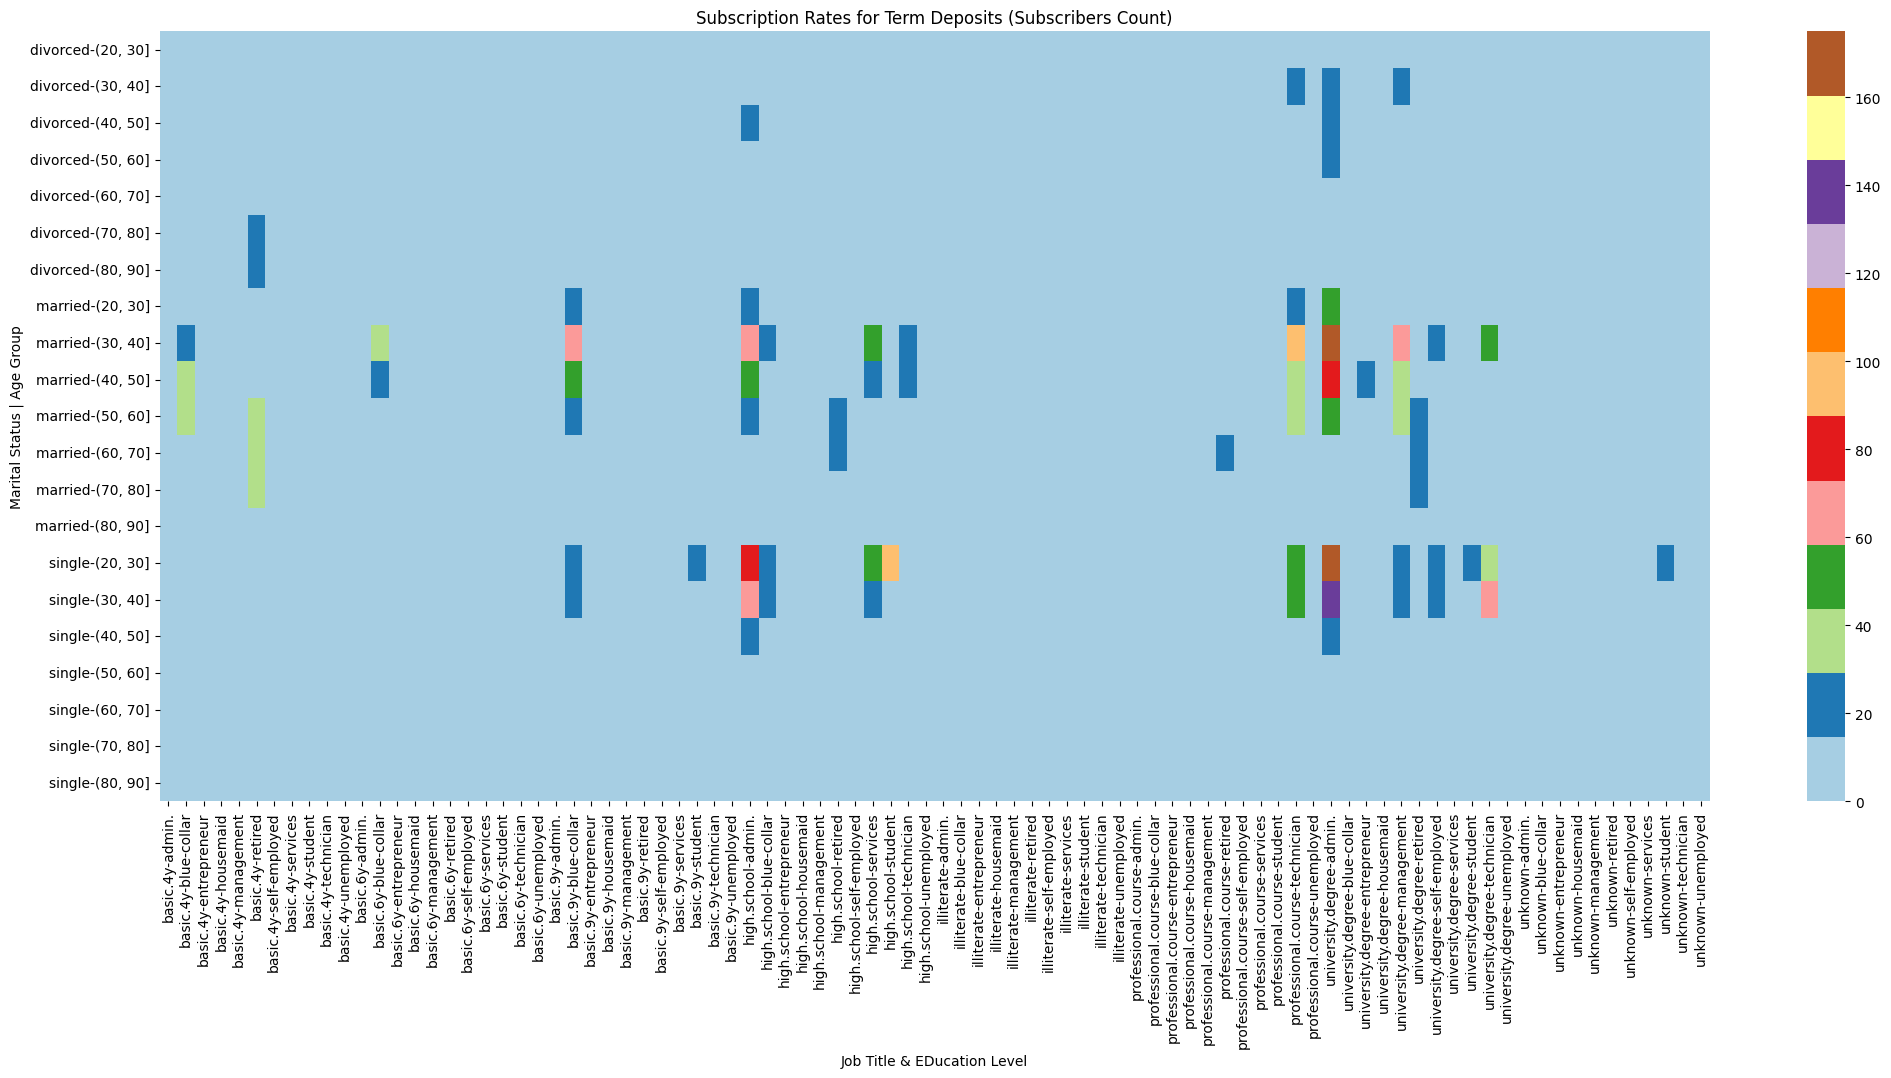

In [211]:
total_rows = sub_df.shape[0]
print(f"Total rows in sub_df: {total_rows}")
age_categories = pd.cut(sub_df['age'], bins=[20,30,40,50,60,70,80,90])  # bin ranges
crosstab = pd.crosstab([sub_df['marital'], age_categories], [sub_df['education'], sub_df['job']],
                       values='y', aggfunc='count')

plt.figure(figsize=(25, 10))
sns.heatmap(crosstab, cmap='Paired')
plt.xlabel('Job Title & EDucation Level')
plt.ylabel('Marital Status | Age Group')
plt.title('Subscription Rates for Term Deposits (Subscribers Count)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


*The data suggests a trend where customers working in administration, who are single between the ages of 20 and 40 or married between 30 and 50, have higher subscription rates for term deposits. This visualization highlights potential associations between educational background, profession, marital status, and age in customers' decisions to purchase term deposits. Further analysis is recommended to confirm these observations and understand the underlying reasons for these trends.*

**Hypothesis # 1 Accepted**

**Recommendations: Focus marketing efforts on demographic segments identified as more likely to subscribe.**

**Hypothesis # 2 : Does contact medium and number of contacts during campaign influence customers' buying desicion?**

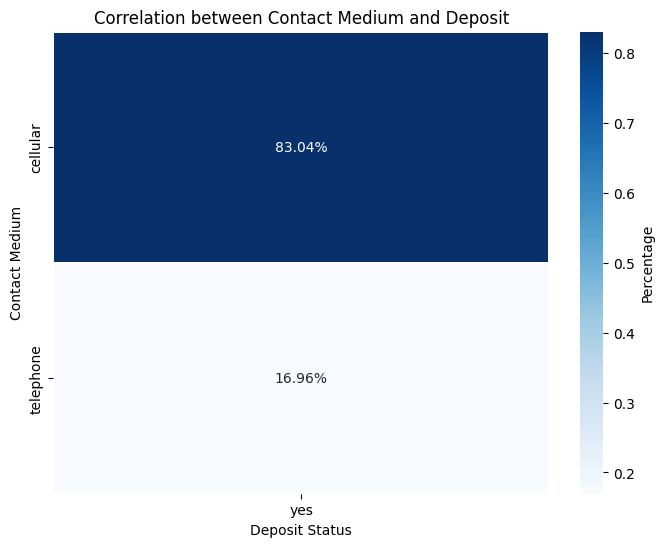

In [212]:
cross_tab = pd.crosstab(sub_df['contact'], sub_df['y'], normalize="all")
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt=".2%", cmap="Blues", linewidths=0.3, cbar_kws={'label': 'Percentage'})
plt.title('Correlation between Contact Medium and Deposit')
plt.xlabel('Deposit Status')
plt.ylabel('Contact Medium')
plt.show()

*The data suggests a trend where the 'cellular' contact medium appears to be associated with a higher purchase rate compared to the 'telephone' medium.*

<ipython-input-213-7eda315d2f9d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



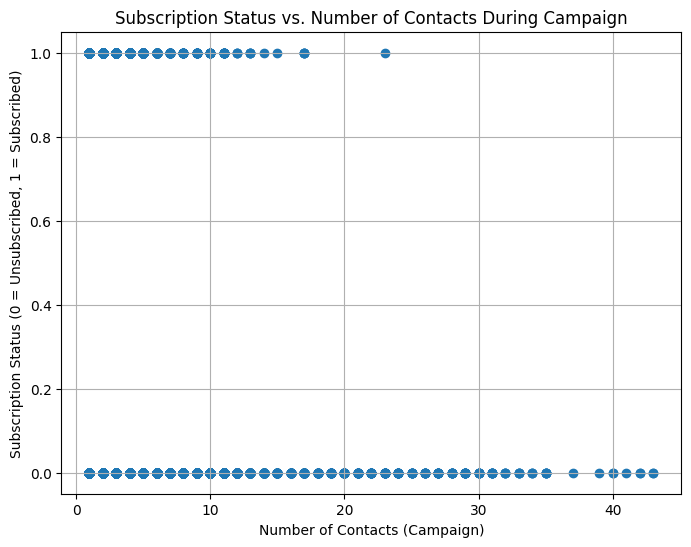

In [213]:
features = ['campaign', 'y']
data = df[features]
data['y']=data['y'].map({'yes':1,'no':0})

plt.figure(figsize=(8, 6))
plt.scatter(data["campaign"], data["y"])
plt.xlabel("Number of Contacts (Campaign)")
plt.ylabel("Subscription Status (0 = Unsubscribed, 1 = Subscribed)")
plt.title("Subscription Status vs. Number of Contacts During Campaign")
plt.grid(True)
plt.show()


*While the current data doesn't show a strong correlation, a more comprehensive analysis could provide further insights into the impact of contact frequency.*

**While contact medium seem to influence but impact of contact frequency needs further analysis.**

**Hypothesis # 2 Rejected.**

**Hypothesis # 3 : Customers who have been previously contacted (e.g., through phone calls, marketing campaigns) are more likely to subscribe to the service compared to new customers who have not been contacted before?**

In [214]:
df["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

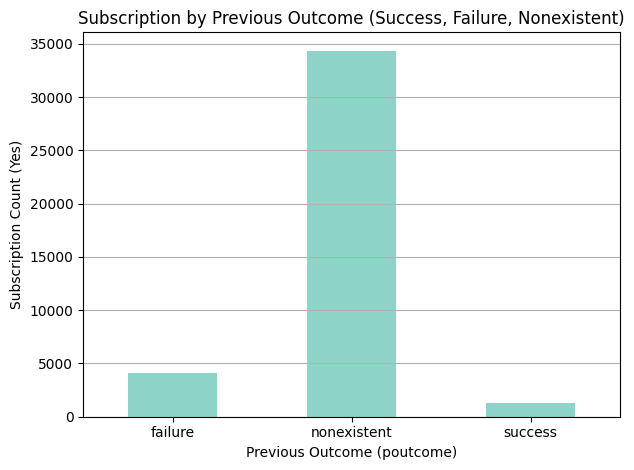

In [293]:
success_col_name = 'Success_Subscription'
failure_col_name = 'Failure_Subscription'
nonexistent_col_name = 'Nonexistent_Subscription'

df[success_col_name] = (df['poutcome'] == 'success') & (df['y'] == 'yes')
df[failure_col_name] = (df['poutcome'] == 'failure') & (df['y'] == 'yes')
df[nonexistent_col_name] = (df['poutcome'] == 'nonexistent') & (df['y'] == 'yes')

outcome_counts = df[[success_col_name, failure_col_name, nonexistent_col_name]].sum(axis=1)
outcome_counts = outcome_counts.groupby(df['poutcome']).count()
outcome_counts.plot(kind='bar', stacked=False, colormap='Set3')
plt.xlabel('Previous Outcome (poutcome)')
plt.ylabel('Subscription Count (Yes)')
plt.title('Subscription by Previous Outcome (Success, Failure, Nonexistent)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


*Previous outcome does not seem to influence subscription decision.Further investigation needed.*

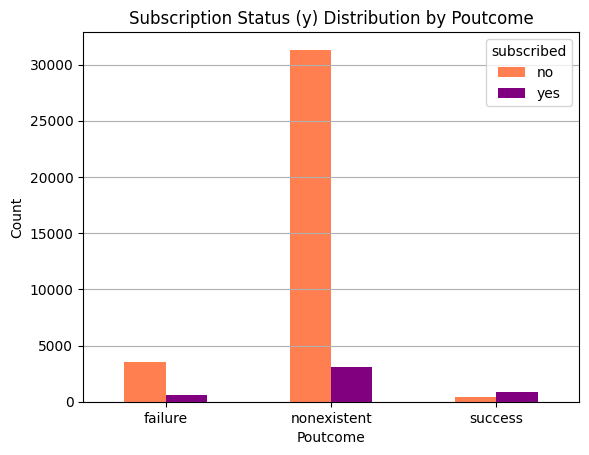

In [225]:
poutcome_sub_counts = df.groupby('poutcome')['y'].value_counts().unstack(fill_value=0)

poutcome_sub_counts.plot(kind='bar', stacked=False, color=['coral', 'purple'])
plt.xlabel("Poutcome")
plt.ylabel("Count")
plt.title("Subscription Status (y) Distribution by Poutcome")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title="subscribed")
plt.show()


In [215]:
import plotly.express as px
filtered_data = df[df["pdays"] != 999]

fig = px.scatter(filtered_data, x="pdays", y="y", color="poutcome",
                 title="Subscription Status vs. Days Since Last Contact (Colored by Previous Campaign Outcome)",
                 labels={"pdays": "Days Since Last Contact", "y": "Subscription Status"})

fig.update_traces(marker=dict(size=10))
fig.show()


*pdays also does not seem to influence subscription decision. Further investigation needed*

In [216]:
sub_df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6])

Total rows in sub_df after filtering (excluding pdays=999): 932


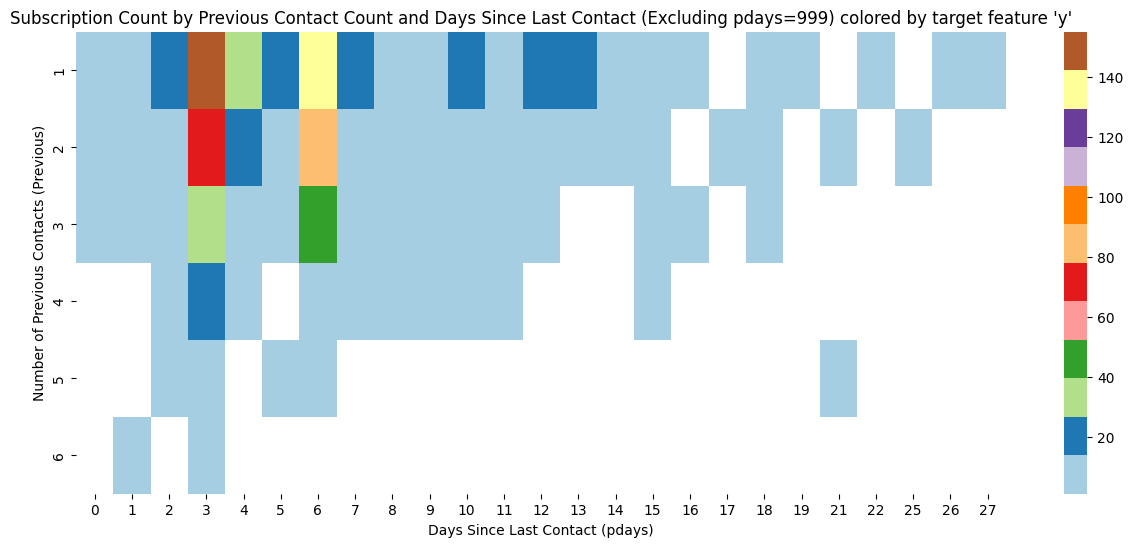

In [217]:
filtered_data = sub_df[sub_df["pdays"] != 999]
total_rows = filtered_data.shape[0]
print(f"Total rows in sub_df after filtering (excluding pdays=999): {total_rows}")
crosstab = pd.crosstab(filtered_data["previous"], filtered_data["pdays"], values="y", aggfunc="count")
plt.figure(figsize=(15, 6))
sns.heatmap(crosstab, cmap="Paired")
plt.xlabel("Days Since Last Contact (pdays)")
plt.ylabel("Number of Previous Contacts (Previous)")
plt.title("Subscription Count by Previous Contact Count and Days Since Last Contact (Excluding pdays=999) colored by target feature 'y'")
plt.grid(False)
plt.show()


Total rows in sub_df after filtering (excluding pdays=999): 932


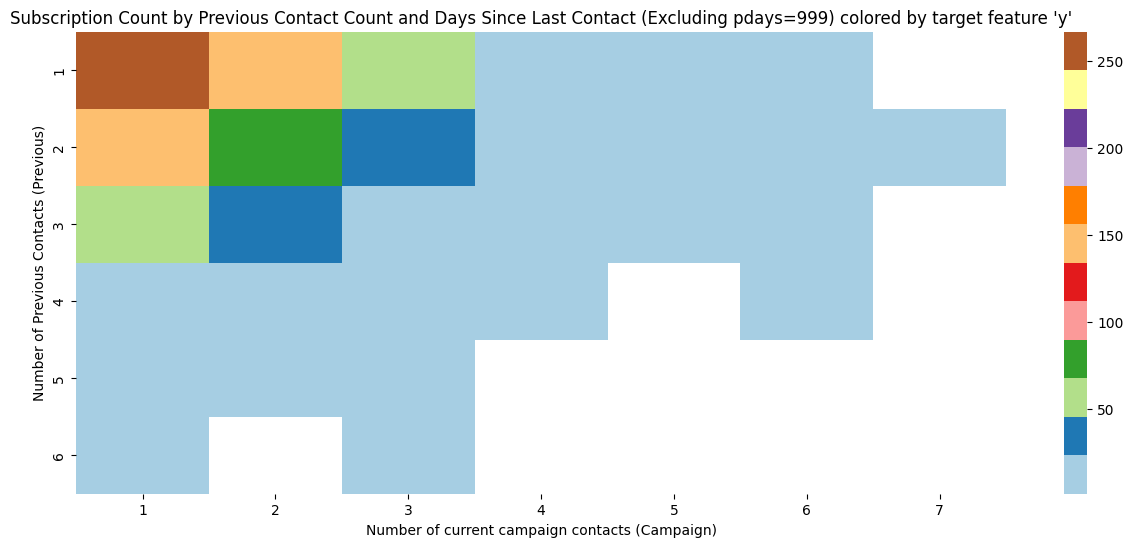

In [296]:
filtered_data = sub_df[sub_df["pdays"] != 999]
total_rows = filtered_data.shape[0]
print(f"Total rows in sub_df after filtering (excluding pdays=999): {total_rows}")
crosstab = pd.crosstab(filtered_data["previous"], filtered_data["campaign"], values="y", aggfunc="count")
plt.figure(figsize=(15, 6))
sns.heatmap(crosstab, cmap="Paired")
plt.xlabel("Number of current campaign contacts (Campaign)")
plt.ylabel("Number of Previous Contacts (Previous)")
plt.title("Subscription Count by Previous Contact Count and Days Since Last Contact (Excluding pdays=999) colored by target feature 'y'")
plt.grid(False)
plt.show()


*As the heatmap depicts, previous contacts does seem to influence buyers' decision.*

**Hypothesis # 3 Approved!**

**Hypothesis # 4 : Do weekdays within certain months lead to higher subscription rates?**

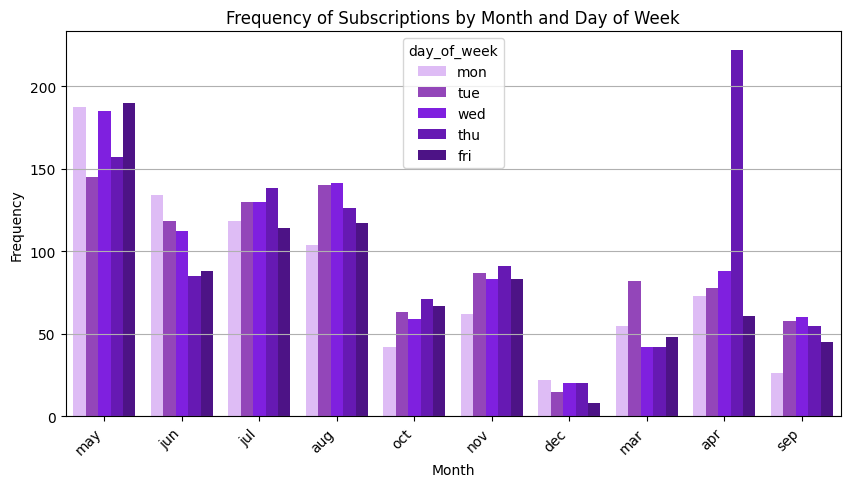

In [297]:
plt.figure(figsize=(10, 5))
custom_palette = [ '#e0b2ff',  '#9933cc',  '#7f00ff', '#6600cc', '#4d0099']
sns.countplot(x="month", hue="day_of_week", data=sub_df, palette=custom_palette)
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Frequency of Subscriptions by Month and Day of Week")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

*There is a potential association between weekdays in May and Thursdays in April with higher subscription rates compared to other weekdays in different months.*

**Hypothesis # 4 Approved**

**Hypothesis # 5 : Does longer call duration ultimately influence buyers' buying decisions?**

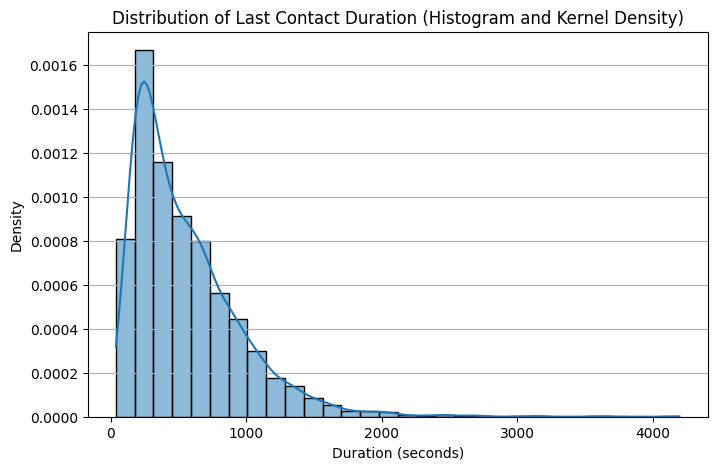

In [219]:
plt.figure(figsize=(8, 5))
sns.histplot(data=sub_df, x="duration", kde=True, stat="density", bins=30, edgecolor='black')
plt.xlabel("Duration (seconds)")
plt.ylabel("Density")
plt.title("Distribution of Last Contact Duration (Histogram and Kernel Density)")
plt.grid(axis='y')
plt.show()


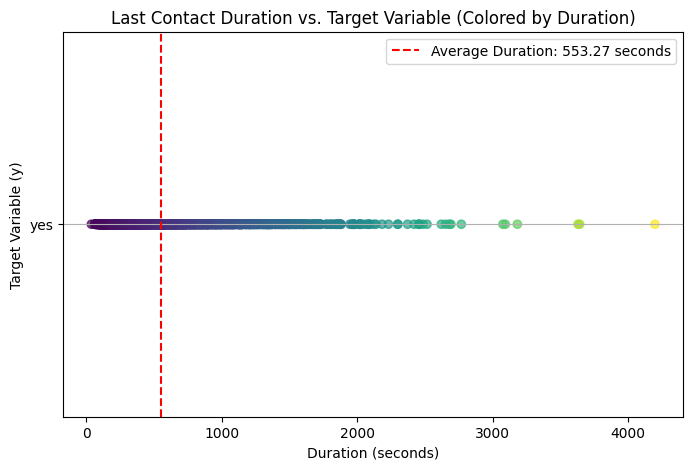

In [220]:
import matplotlib.cm as cm
avg_duration = sub_df["duration"].mean()

colors = cm.viridis(sub_df["duration"] / sub_df["duration"].max())
plt.figure(figsize=(8, 5))
plt.scatter(sub_df["duration"], sub_df["y"], c=colors, alpha=0.7)
plt.axvline(x=avg_duration, color='red', linestyle='dashed', label=f'Average Duration: {avg_duration:.2f} seconds')
plt.xlabel("Duration (seconds)")
plt.ylabel("Target Variable (y)")
plt.title("Last Contact Duration vs. Target Variable (Colored by Duration)")
plt.grid(axis='y')
plt.legend()
plt.show()


<ipython-input-221-4bd58a0b9f9a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




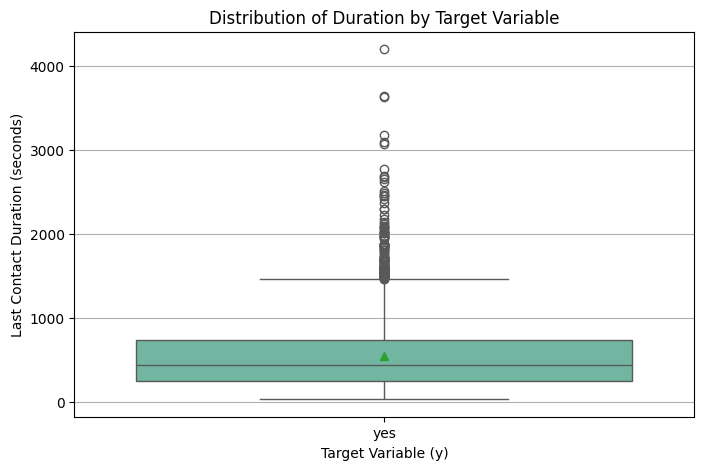

In [221]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="y", y="duration", showmeans=True, data=sub_df,palette='Set2')
plt.xlabel("Target Variable (y)")
plt.ylabel("Last Contact Duration (seconds)")
plt.title("Distribution of Duration by Target Variable")
plt.grid(axis='y')
plt.show()


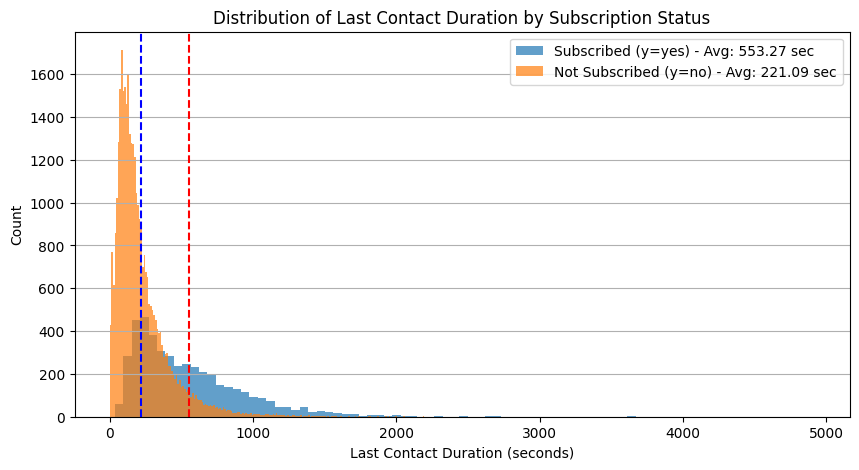

In [222]:
avg_duration_yes = df[df['y'] == 'yes']['duration'].mean()
avg_duration_no = df[df['y'] == 'no']['duration'].mean()
plt.figure(figsize=(10, 5))
plt.hist(df[df['y'] == 'yes']["duration"], bins='auto', alpha=0.7, label=f'Subscribed (y=yes) - Avg: {avg_duration_yes:.2f} sec')
plt.hist(df[df['y'] == 'no']["duration"], bins='auto', alpha=0.7, label=f'Not Subscribed (y=no) - Avg: {avg_duration_no:.2f} sec')
plt.xlabel("Last Contact Duration (seconds)")
plt.ylabel("Count")
plt.title("Distribution of Last Contact Duration by Subscription Status")
plt.grid(axis='y')
plt.legend()
# Add vertical lines for average durations
plt.axvline(x=avg_duration_yes, color='red', linestyle='dashed', label='Avg Duration (Yes)')
plt.axvline(x=avg_duration_no, color='blue', linestyle='dashed', label='Avg Duration (No)')
plt.show()

In [223]:
# --- Segmentation by Duration Ranges ---

bins = [0, 30, 60, 120, float('inf')]
labels = ['0-30 sec', '31-60 sec', '61-120 sec', '120+ sec']

duration_segments = pd.cut(df['duration'], bins=bins, labels=labels)
subscription_rates = df.groupby(duration_segments)['y'].value_counts().unstack(fill_value=0)
subscription_rates = subscription_rates.div(subscription_rates.sum(axis=1), axis=0) * 100  # Calculate percentages
print("Subscription Rates by Duration Range:")
print(subscription_rates)

Subscription Rates by Duration Range:
y                   no        yes
duration                         
0-30 sec    100.000000   0.000000
31-60 sec    99.959498   0.040502
61-120 sec   98.082225   1.917775
120+ sec     84.165447  15.834553


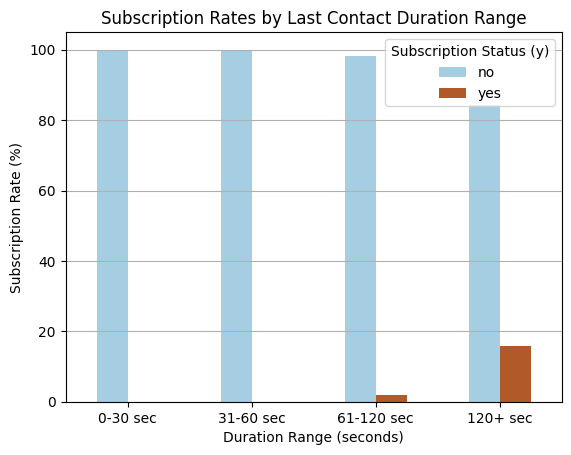

In [224]:
subscription_rates.plot(kind='bar', stacked=False, colormap='Paired')
plt.xlabel("Duration Range (seconds)")
plt.ylabel("Subscription Rate (%)")
plt.title("Subscription Rates by Last Contact Duration Range")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Subscription Status (y)')
plt.show()


*Duration is an important feature as it directly influence target variable 'y'. i.e If call duration is 0, then 'y' is also 0(No).*

*The graph shows that longer duration can ultimately influence buyers' decision.But futher investigation is needed.*

**Hypothesis # 5 Accepted**

**Hypothesis # 6 : Customers with default status , personal and housing loans are less likely to subscribe.**

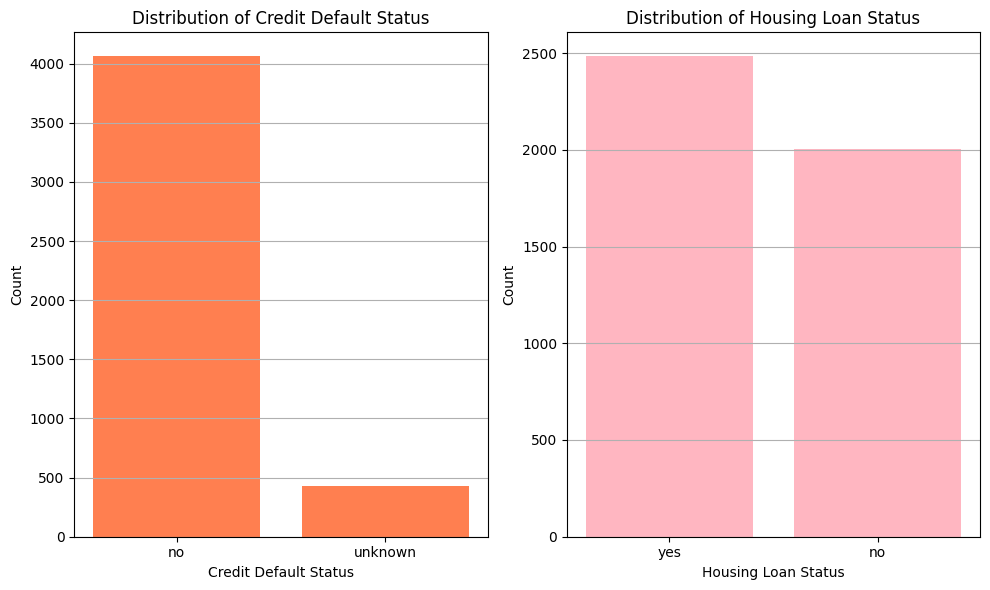

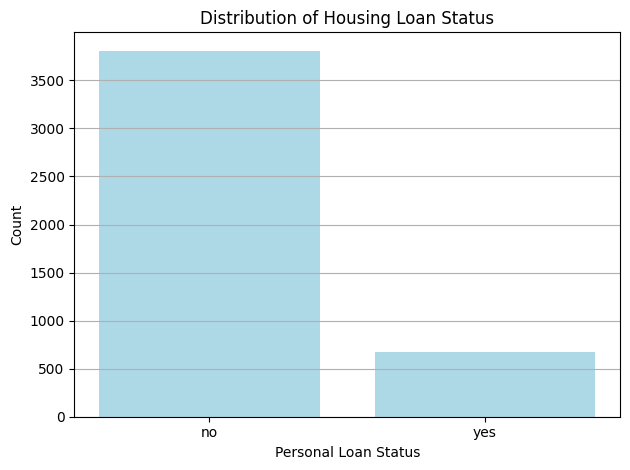

In [299]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.bar(sub_df['default'].value_counts().index, sub_df['default'].value_counts().values, color='coral')
plt.xlabel("Credit Default Status")
plt.ylabel("Count")
plt.title("Distribution of Credit Default Status")
plt.grid(axis='y')

plt.subplot(122)
plt.bar(sub_df['housing'].value_counts().index, sub_df['housing'].value_counts().values, color='lightpink')
plt.xlabel("Housing Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Housing Loan Status")
plt.grid(axis='y')

plt.tight_layout()
plt.show()

plt.bar(sub_df['loan'].value_counts().index, sub_df['loan'].value_counts().values, color='lightblue')
plt.xlabel("Personal Loan Status")
plt.ylabel("Count")
plt.title("Distribution of Housing Loan Status")
plt.grid(axis='y')

plt.tight_layout()
plt.show()



*Although buyers with personal loan or default status were less likely to buy term deposit. but that's not the case for housing loan.*
*Subscribed customers dataset have a high number of buyers who have housing loan. So, they can be a potential candidates for target marketing.*
**Hypothesis # 6 Rejected.**

**HYpothesis # 7 : Consumers' economical factors affect their buying' decisions.**

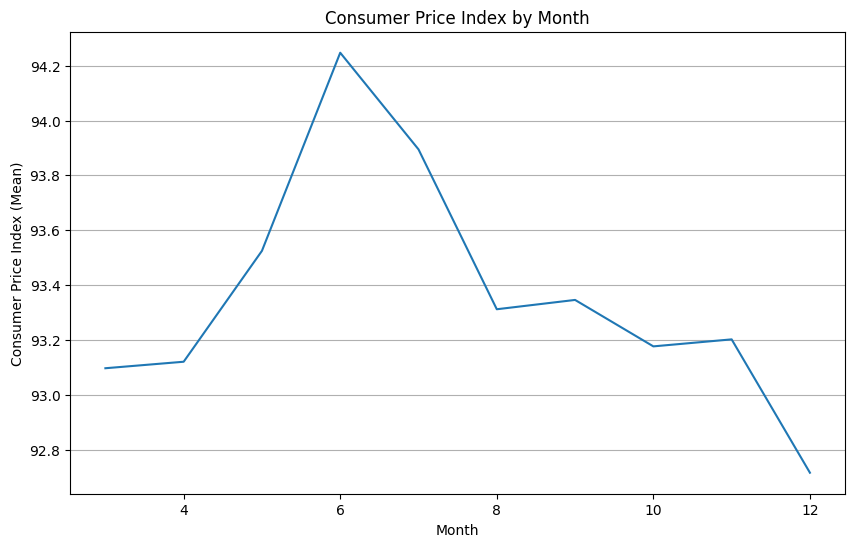

In [227]:
df['month_number'] = pd.to_datetime(df['month'], format='%b').dt.month  # Adjust format if needed

# Time Series Plot (assuming monthly data)
df_grouped = df.groupby('month_number')['cons.price.idx'].mean()  # Group by month and calculate mean
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped.values)  # Use month number (index) and mean values
plt.xlabel("Month")  # Label now reflects month number
plt.ylabel("Consumer Price Index (Mean)")
plt.title("Consumer Price Index by Month")
plt.grid(axis='y')
plt.show()


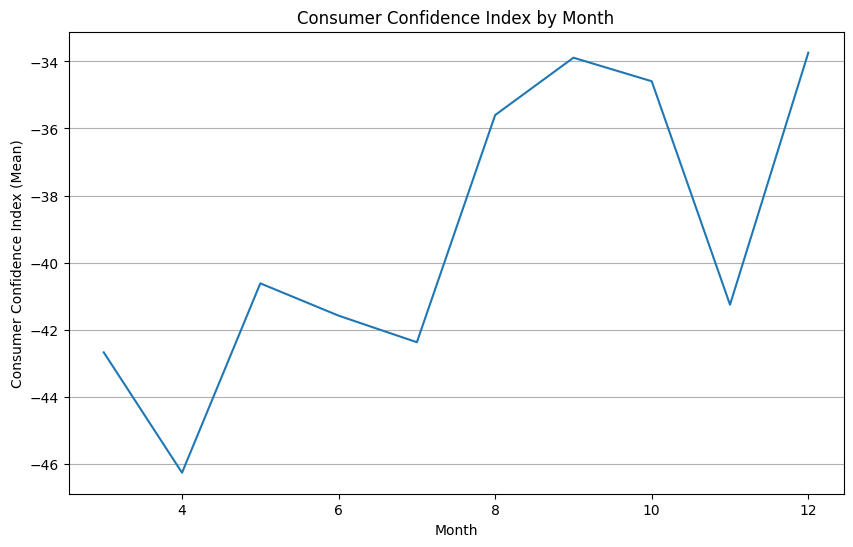

In [228]:
df['month_number'] = pd.to_datetime(df['month'], format='%b').dt.month  # Adjust format if needed

# Time Series Plot (assuming monthly data)
df_grouped = df.groupby('month_number')['cons.conf.idx'].mean()  # Group by month and calculate mean
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped.values)  # Use month number (index) and mean values
plt.xlabel("Month")  # Label now reflects month number
plt.ylabel("Consumer Confidence Index (Mean)")
plt.title("Consumer Confidence Index by Month")
plt.grid(axis='y')
plt.show()


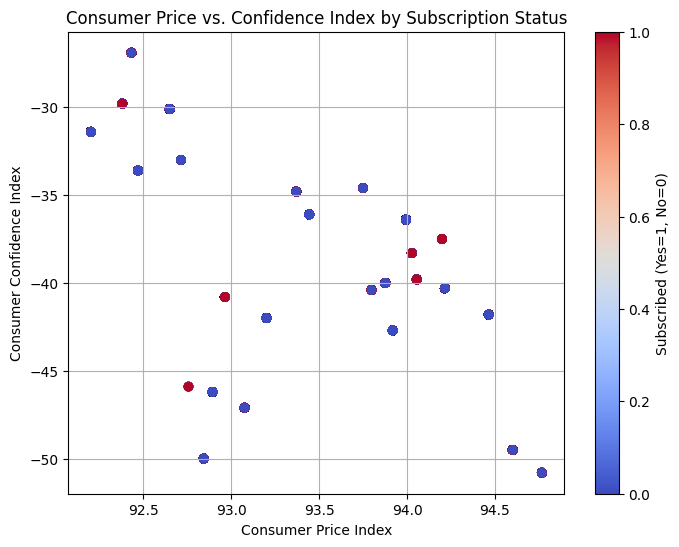

In [229]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(8, 6))
plt.scatter(df['cons.price.idx'], df['cons.conf.idx'], c=df['y'], cmap='coolwarm')
plt.xlabel('Consumer Price Index')
plt.ylabel('Consumer Confidence Index')
plt.title('Consumer Price vs. Confidence Index by Subscription Status')
plt.grid(True)
plt.colorbar(label='Subscribed (Yes=1, No=0)')
plt.show()


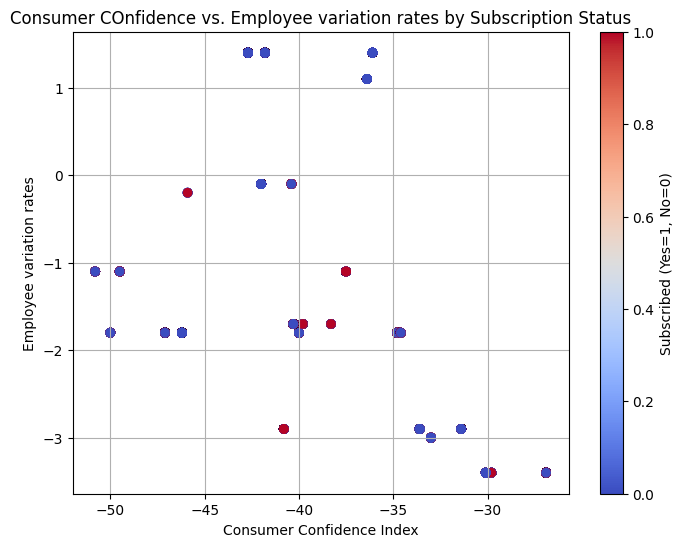

In [300]:
plt.figure(figsize=(8, 6))
plt.scatter(df['cons.conf.idx'], df['emp.var.rate'], c=df['y'], cmap='coolwarm')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Employee variation rates')
plt.title('Consumer COnfidence vs. Employee variation rates by Subscription Status')
plt.grid(True)
plt.colorbar(label='Subscribed (Yes=1, No=0)')
plt.show()


*This graph depicts that customers with low emp.var.rate and high cons.conf.idx are more likely to purchase.*

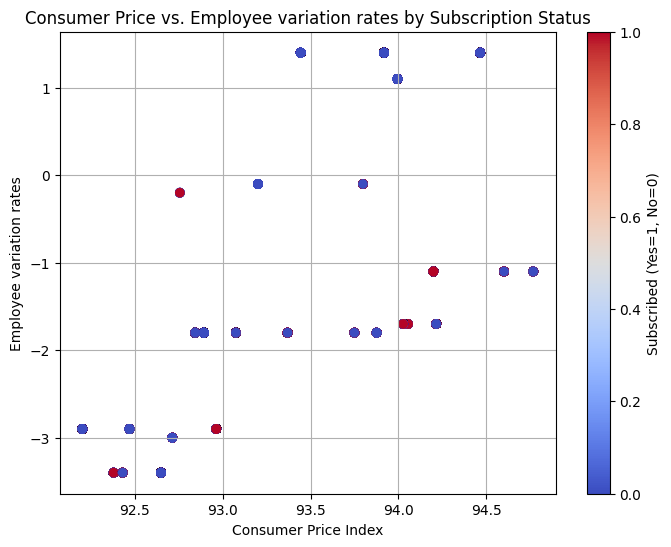

In [305]:
plt.figure(figsize=(8, 6))
plt.scatter(df['cons.price.idx'], df['emp.var.rate'], c=df['y'], cmap='coolwarm')
plt.xlabel('Consumer Price Index')
plt.ylabel('Employee variation rates')
plt.title('Consumer Price vs. Employee variation rates by Subscription Status')
plt.grid(True)
plt.colorbar(label='Subscribed (Yes=1, No=0)')
plt.show()


*Graphs depict that CCI, CPI and EVR have very weak association. Further investigation needed.*

<Figure size 1000x600 with 0 Axes>

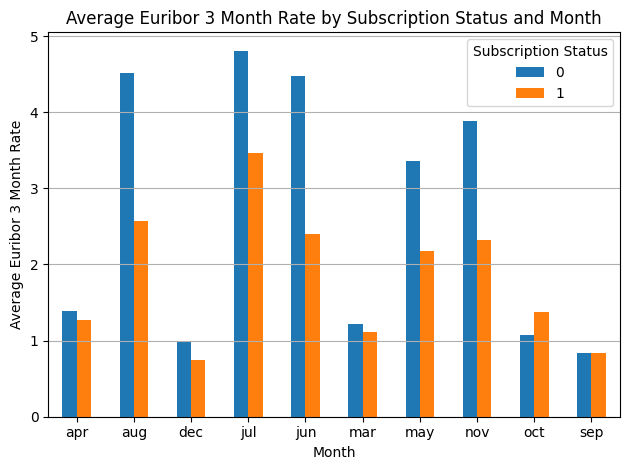

In [232]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby(['month', 'y'])['euribor3m'].mean().unstack()
df_grouped.plot(kind='bar', stacked=False)
plt.xlabel('Month')
plt.ylabel('Average Euribor 3 Month Rate')
plt.title('Average Euribor 3 Month Rate by Subscription Status and Month')
plt.grid(axis='y')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability (optional)
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

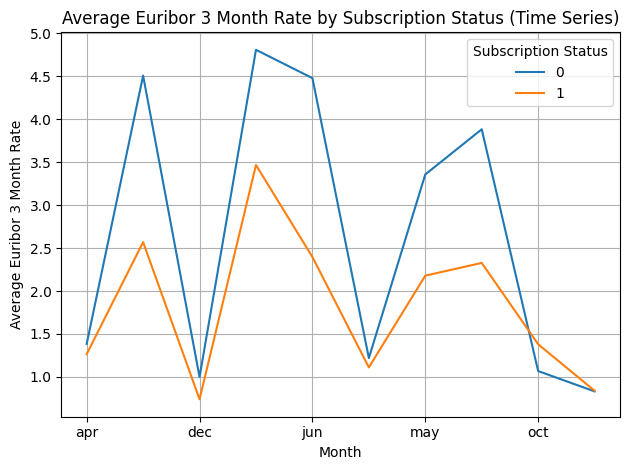

In [236]:
plt.figure(figsize=(10, 6))
df_grouped = df.groupby(['month', 'y'])['euribor3m'].mean().unstack()
df_grouped.plot(kind='line')  # Change 'bar' to 'line' for time series
plt.xlabel('Month')
plt.ylabel('Average Euribor 3 Month Rate')
plt.title('Average Euribor 3 Month Rate by Subscription Status (Time Series)')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels for readability (optional)
plt.legend(title='Subscription Status')
plt.tight_layout()
plt.show()

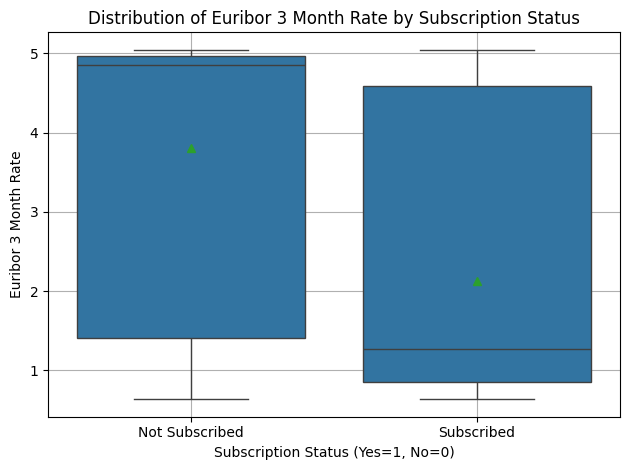

In [240]:

sns.boxplot(
    x = "y",
    y = "euribor3m",
    showmeans=True,
    data=df
)

# Customize the plot
plt.xlabel('Subscription Status (Yes=1, No=0)')
plt.ylabel('Euribor 3 Month Rate')
plt.title('Distribution of Euribor 3 Month Rate by Subscription Status')
plt.grid(True)
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.tight_layout()
plt.show()


**Customers who subscribed have relatively lower euribor3m than those who didn't.**

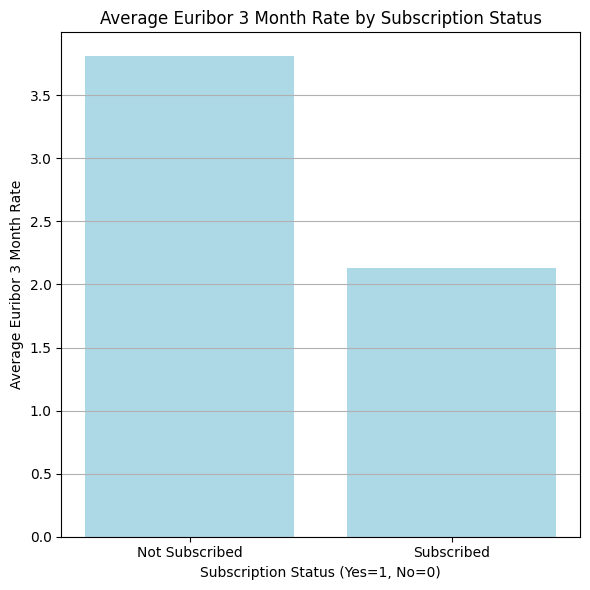

In [244]:

# Bar chart (average Euribor3m by subscription status)
plt.figure(figsize=(6, 6))
plt.bar(df['y'].unique(), df.groupby('y')['euribor3m'].mean(), color='lightblue')
plt.xlabel('Subscription Status (Yes=1, No=0)')
plt.ylabel('Average Euribor 3 Month Rate')
plt.title('Average Euribor 3 Month Rate by Subscription Status')
plt.grid(axis='y')
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.tight_layout()
plt.show()


*Customers who fall within the Euribor 3 month rate range of 0.0 to 2.3 might have a higher concentration of subscriptions compared to customers with Euribor 3 month rates outside this range.*

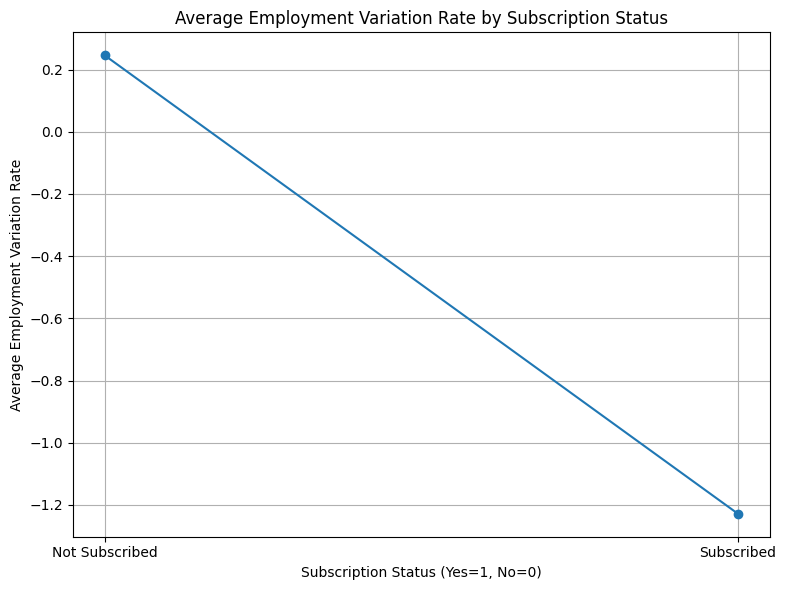

In [249]:
# Grouped line plot (average emp.var.rate by subscription status)
plt.figure(figsize=(8, 6))
df_grouped = df.groupby(['y'])['emp.var.rate'].mean().reset_index()
plt.plot(df_grouped['y'], df_grouped['emp.var.rate'], marker='o', linestyle='-')
plt.xlabel('Subscription Status (Yes=1, No=0)')
plt.ylabel('Average Employment Variation Rate')
plt.title('Average Employment Variation Rate by Subscription Status')
plt.grid(True)
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.tight_layout()
plt.show()


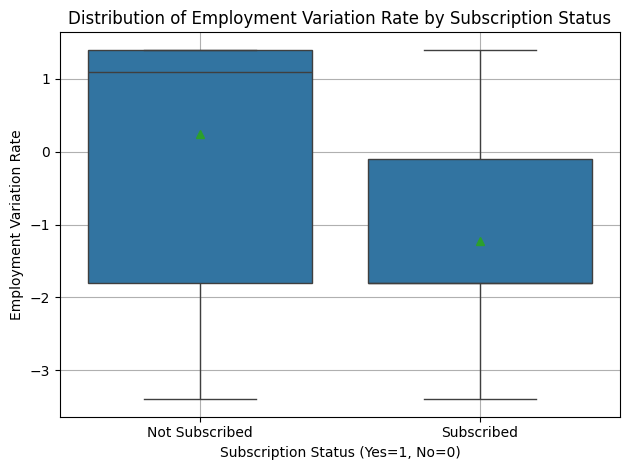

In [253]:
sns.boxplot(
    x = "y",
    y = "emp.var.rate",
    showmeans=True,
    data=df
)

# Customize the plot
plt.xlabel('Subscription Status (Yes=1, No=0)')
plt.ylabel('Employment Variation Rate')
plt.title('Distribution of Employment Variation Rate by Subscription Status')
plt.grid(True)
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.tight_layout()
plt.show()


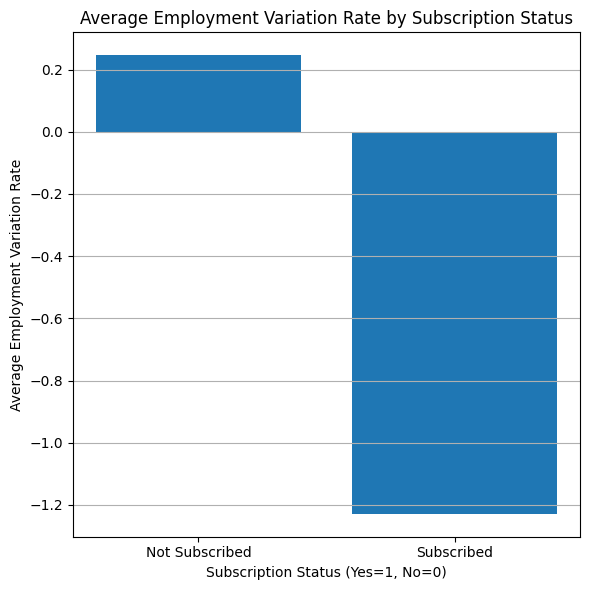

In [252]:
plt.figure(figsize=(6, 6))
plt.bar(df['y'].unique(), df.groupby('y')['emp.var.rate'].mean())
plt.xlabel('Subscription Status (Yes=1, No=0)')
plt.ylabel('Average Employment Variation Rate')
plt.title('Average Employment Variation Rate by Subscription Status')
plt.grid(axis='y')
plt.xticks([0, 1], ['Not Subscribed', 'Subscribed'])
plt.tight_layout()
plt.show()


*The graphs suggests that customers with lower Emp variation rate are likely to subcribe.*

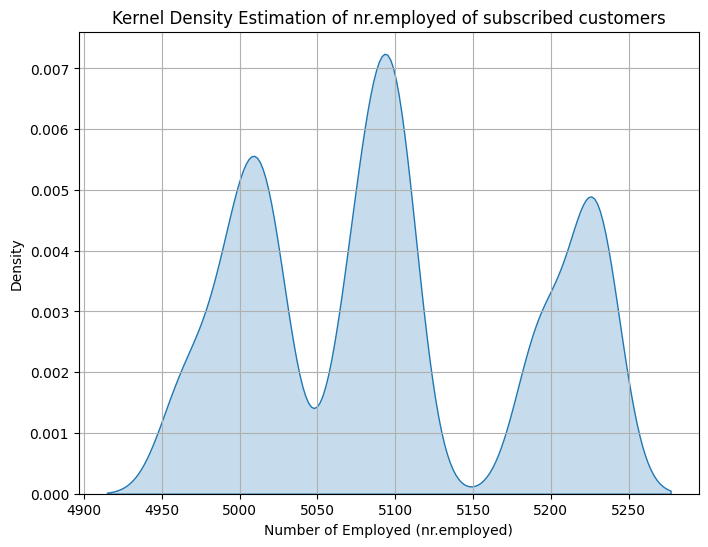

In [302]:
plt.figure(figsize=(8, 6))
sns.kdeplot(sub_df['nr.employed'], fill=True)
plt.xlabel('Number of Employed (nr.employed)')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of nr.employed of subscribed customers')
plt.grid(True)
plt.show()

*The multimodal distribution of nr.employed indicates the presence of multiple employer categories. This might require using statistical methods suited for non-normal distributions for accurate analysis*

**Customers' financial conditions does seem to impact their decision.**

**Hypothesis # 7 Approved.**